<img src="https://www.thereportingtoday.com/wp-content/uploads/2023/01/Delhivery-Logo.jpg" width="1200">

---

## About Delhivery 🚚

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

### Business Problem 💡

The company wants to understand and process the data coming out of data engineering pipelines:

- Clean, sanitize and manipulate data to get useful features out of raw fields
- Make sense out of the raw data and help the data science team to build forecasting models on it

---

### Dataset 📊

Column Profiling
| Field Name                       | Description |
|----------------------------------|-------------|
| data                             | Tells whether the data is testing or training data |
| trip_creation_time               | Timestamp of trip creation |
| route_schedule_uuid              | Unique Id for a particular route schedule |
| route_type                       | Transportation type (FTL: Full Truck Load, Carting: Handling system consisting of small vehicles (carts)) |
| trip_uuid                        | Unique ID given to a particular trip (A trip may include different source and destination centers) |
| source_center                    | Source ID of trip origin |
| source_name                      | Source Name of trip origin |
| destination_center               | Destination ID |
| destination_name                 | Destination Name |
| od_start_time                    | Trip start time |
| od_end_time                      | Trip end time |
| start_scan_to_end_scan           | Time taken to deliver from source to destination |
| is_cutoff                        | Unknown field |
| cutoff_factor                    | Unknown field |
| cutoff_timestamp                 | Unknown field |
| actual_distance_to_destination   | Distance in Kms between source and destination warehouse |
| actual_time                      | Actual time taken to complete the delivery (Cumulative) |
| osrm_time                        | An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative) |
| osrm_distance                    | An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative) |
| factor                           | Unknown field |
| segment_actual_time              | This is a segment time. Time taken by the subset of the package delivery |
| segment_osrm_time                | This is the OSRM segment time. Time taken by the subset of the package delivery |
| segment_osrm_distance            | This is the OSRM distance. Distance covered by subset of the package delivery |
| segment_factor                   | Unknown field |

---

#### Importing Required Libraries 🤝

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set figure size
plt.rcParams['figure.figsize'] = [12, 6]

# set the seaborn style
palette = ['black', 'red']
sns.set(style='ticks', palette=palette)

In [4]:
# setting the option of displaying all the columns
pd.set_option('display.max_columns', 50)

---

#### Read Dataset 🔍

In [5]:
# Read the data
delhivery_data = pd.read_csv(r'../data/delhivery_data.csv')
dd = delhivery_data.copy()
dd.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [6]:
print("Shape of the data: ", dd.shape)
print("The Given Dataset has {} rows and {} columns".format(dd.shape[0], dd.shape[1]))
print("Columns: ", dd.columns)

Shape of the data:  (144867, 24)
The Given Dataset has 144867 rows and 24 columns
Columns:  Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')


### 🕵🏽‍♂️ Shape:

* The dataset comprises 144,867 rows and 24 columns, representing a substantial volume of data. 
* Each row corresponds to transport between one source point to other point (delivery details of one package are divided into several rows)

---

### Data Structure 📰

In [7]:
# Drop the columns which are not required
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
dd = dd.drop(columns = unknown_fields)

In [8]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [9]:
# Datatype conversion for the columns
dd['trip_creation_time'] = pd.to_datetime(dd['trip_creation_time'])
dd['od_start_time'] = pd.to_datetime(dd['od_start_time']) 
dd['od_end_time'] = pd.to_datetime(dd['od_end_time'])

cat_cols = dd.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    dd[col] = dd[col].astype('category')

float_cols = dd.select_dtypes(include=['float64']).columns
for col in float_cols:
    dd[col] = dd[col].astype('float16')

dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  category      
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  category      
 5   source_center                   144867 non-null  category      
 6   source_name                     144574 non-null  category      
 7   destination_center              144867 non-null  category      
 8   destination_name                144606 non-null  category      
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

* Conversion of categorical attributes to 'category' 
* Datetime fields to 'datetime'
* float64 to float16, to reduce the memory usage from ~21 MB to ~8 MB

In [10]:
# Missing values and their percentage
missing_values = dd.isnull().sum().reset_index(name='missing_values')
missing_values['percentage_%'] = (missing_values['missing_values']/dd.shape[0])*100
missing_values = missing_values.sort_values(by='missing_values', ascending=False)
missing_values = missing_values[missing_values['missing_values'] > 0]
missing_values

,index,missing_values,percentage_%
6,source_name,293,0.202254
8,destination_name,261,0.180165


In [11]:
dd[dd['source_name'].isnull()].head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,22.78125,48.0,34.0,37.78125,48.0,34.0,37.781250
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,46.06250,98.0,41.0,56.34375,49.0,33.0,34.156250
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,67.68750,127.0,58.0,80.50000,29.0,17.0,24.125000
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,88.12500,156.0,73.0,101.25000,28.0,14.0,20.781250
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,112.68750,212.0,92.0,128.00000,55.0,18.0,26.734375


In [12]:
# dd[(dd['source_name'].isnull()) & ~(dd['source_center'].isnull())]
missing_source_name = dd[dd['source_name'].isnull()]['source_center'].unique().tolist()
dd[(dd['source_center'].isin(missing_source_name)) & ~(dd['source_name'].isnull())]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance


In [13]:
missing_destination_name = dd[dd['destination_name'].isnull()]['destination_center'].unique().tolist()
dd[(dd['destination_center'].isin(missing_destination_name)) & ~(dd['destination_name'].isnull())]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance


In [14]:
missing_trip_data = dd[(dd['source_name'].isnull()) | (dd['destination_name'].isnull())]['trip_uuid'].unique().tolist()

In [15]:
print(f"Number of Trips having missing data: {len(missing_trip_data)}")
print(f"Total number of Trips: {dd['trip_uuid'].nunique()}")
print(f"Missing Trip Percentage: {round(len(missing_trip_data)/dd['trip_uuid'].nunique()*100,2)}")

Number of Trips having missing data: 110
Total number of Trips: 14817
Missing Trip Percentage: 0.74


In [16]:
dd = dd[~dd['trip_uuid'].isin(missing_trip_data)]

* We have 0.7% of data missing, hence dropping those data

In [17]:
dd.duplicated().sum()

0

In [18]:
dd.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,143713,2018-09-22 12:34:01.122491904,2018-09-12 00:00:16.535741,2018-09-17 02:33:32.314778112,2018-09-22 02:54:50.852296960,2018-09-27 17:28:45.461110016,2018-10-03 23:59:42.701692,NaN
od_start_time,143713,2018-09-22 17:01:31.270683136,2018-09-12 00:00:16.535741,2018-09-17 07:00:42.244400896,2018-09-22 06:36:29.552777984,2018-09-27 21:14:43.582704896,2018-10-06 04:27:23.392375,NaN
od_end_time,143713,2018-09-23 09:08:33.888178176,2018-09-12 00:50:10.814399,2018-09-18 01:02:03.127152896,2018-09-23 02:26:43.998577920,2018-09-28 12:11:21.606330880,2018-10-08 03:00:24.353479,NaN
start_scan_to_end_scan,143713.0,NaN,20.0,161.0,454.0,1660.0,7896.0,NaN
actual_distance_to_destination,143713.0,NaN,9.0,23.359375,66.1875,287.25,1927.0,NaN
actual_time,143713.0,NaN,9.0,52.0,132.0,519.0,4532.0,NaN
osrm_time,143713.0,NaN,6.0,27.0,65.0,262.0,1686.0,NaN
osrm_distance,143713.0,NaN,9.007812,29.921875,78.875,348.5,2326.0,NaN
segment_actual_time,143713.0,NaN,-244.0,20.0,28.0,40.0,3052.0,NaN
segment_osrm_time,143713.0,NaN,0.0,11.0,17.0,22.0,1611.0,NaN


In [19]:
dd.describe(include='category').T

,count,unique,top,freq
data,143713,2,training,104358
route_schedule_uuid,143713,1485,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,143713,2,FTL,98533
trip_uuid,143713,14707,trip-153846035308581166,101
source_center,143713,1494,IND000000ACB,23267
source_name,143713,1494,Gurgaon_Bilaspur_HB (Haryana),23267
destination_center,143713,1465,IND000000ACB,15180
destination_name,143713,1465,Gurgaon_Bilaspur_HB (Haryana),15180


### 🕵🏽‍♂️ Insights:
* Unknown columns are dropped
* ~0.7% of the record has missing source name and destination name, hence dropped
* There is no duplicate record found in the table
* The Given dataset has data from "2018-09-12" to "2018-10-03"

---

### Data Aggregations 🈴

In [20]:
dd['unique_trip'] = dd['trip_uuid'].str.cat([dd['source_center'], dd['destination_center']], sep="_")
dd['unique_trip'].head()

0    trip-153741093647649320_IND388121AAA_IND388620AAB
1    trip-153741093647649320_IND388121AAA_IND388620AAB
2    trip-153741093647649320_IND388121AAA_IND388620AAB
3    trip-153741093647649320_IND388121AAA_IND388620AAB
4    trip-153741093647649320_IND388121AAA_IND388620AAB
Name: unique_trip, dtype: object

In [21]:
agg_dict = {
    'trip_uuid': 'first',
    'data':'first',
    'trip_creation_time': 'first',
    'route_type': 'first',
    'source_name': 'first',
    'destination_name': 'first',
    'od_start_time': 'first',
    'od_end_time': 'first',
    'start_scan_to_end_scan': 'first',
    'actual_distance_to_destination': 'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
}

dd_grouped = dd.groupby(by="unique_trip", as_index=False).agg(agg_dict)

In [22]:
dd_grouped.head()

,unique_trip,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.750000,732.0,329.0,446.500000,728.0,534.0,670.593750
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,441.000000,830.0,388.0,545.000000,820.0,474.0,649.859375
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.640625,47.0,26.0,28.203125,46.0,26.0,28.203125
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.531250,96.0,42.0,56.906250,95.0,39.0,55.986328
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.500000,611.0,212.0,281.250000,608.0,231.0,317.718750


In [23]:
dd_grouped.shape

(26037, 17)

In [24]:
dd_grouped['source_name']

0        Kanpur_Central_H_6 (Uttar Pradesh)
1        Bhopal_Trnsport_H (Madhya Pradesh)
2         Doddablpur_ChikaDPP_D (Karnataka)
3             Tumkur_Veersagr_I (Karnataka)
4             Gurgaon_Bilaspur_HB (Haryana)
                        ...                
26032    Tirchchndr_Shnmgprm_D (Tamil Nadu)
26033     Peikulam_SriVnktpm_D (Tamil Nadu)
26034          Eral_Busstand_D (Tamil Nadu)
26035         Sandur_WrdN1DPP_D (Karnataka)
26036                    Hospet (Karnataka)
Name: source_name, Length: 26037, dtype: category
Categories (1498, object): ['AMD_Memnagar (Gujarat)', 'AMD_Rakhial (Gujarat)', 'Abohar_DC (Punjab)', 'Achrol_BgwriDPP_D (Rajasthan)', ..., 'YamunaNagar_DC (Haryana)', 'Yellandu_Sudimala_D (Telangana)', 'Yellareddy_JKRoad_D (Telangana)', 'Zahirabad_Mohim_D (Telangana)']

---

### Feature Extraction ⚙️

#### Extracting the city, state and code from source/destination name

In [25]:
dd_grouped['source_state'] = dd_grouped['source_name'].apply(lambda name: name[name.index('(')+1:name.index(')')])
dd_grouped['source_point'] = dd_grouped['source_name'].apply(lambda name: name[:name.index('(')-1])
dd_grouped['source_city'] = dd_grouped['source_point'].apply(lambda name: name.split('_')[0])
dd_grouped['source_code'] = dd_grouped['source_point'].apply(lambda name: "_".join(name.split('_')[1:]))
dd_grouped[['source_point','source_state','source_city','source_code']].head()

,source_point,source_state,source_city,source_code
0,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central_H_6
1,Bhopal_Trnsport_H,Madhya Pradesh,Bhopal,Trnsport_H
2,Doddablpur_ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D
3,Tumkur_Veersagr_I,Karnataka,Tumkur,Veersagr_I
4,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB


In [26]:
dd_grouped['destination_state'] = dd_grouped['destination_name'].apply(lambda name: name[name.index('(')+1:name.index(')')])
dd_grouped['destination_point'] = dd_grouped['destination_name'].apply(lambda name: name[:name.index('(')-1])
dd_grouped['destination_city'] = dd_grouped['destination_point'].apply(lambda name: name.split('_')[0])
dd_grouped['destination_code'] = dd_grouped['destination_point'].apply(lambda name: "_".join(name.split('_')[1:]))
dd_grouped[['destination_name','destination_state','destination_city','destination_code']].head()

,destination_name,destination_state,destination_city,destination_code
0,Gurgaon_Bilaspur_HB (Haryana),Haryana,Gurgaon,Bilaspur_HB
1,Kanpur_Central_H_6 (Uttar Pradesh),Uttar Pradesh,Kanpur,Central_H_6
2,Chikblapur_ShntiSgr_D (Karnataka),Karnataka,Chikblapur,ShntiSgr_D
3,Doddablpur_ChikaDPP_D (Karnataka),Karnataka,Doddablpur,ChikaDPP_D
4,Chandigarh_Mehmdpur_H (Punjab),Punjab,Chandigarh,Mehmdpur_H


#### Mapping the city short codes to city names

In [27]:
source_cities = dd_grouped[dd_grouped['source_city'].str.len() == 3]['source_city'].unique().tolist()
destination_cities = dd_grouped[dd_grouped['destination_city'].str.len() == 3]['destination_city'].unique().tolist()

source_cities.extend(destination_cities)
city_short_codes = list(set(source_cities))
city_short_codes

city_code_map = {
    'FBD': 'Faridabad',
    'GGN': 'Gurgaon',
    'DEL': 'Delhi',
    'BLR': 'Bangalore',
    'HYD': 'Hyderabad',
    'AMD': 'Ahmedabad',
    'MAA': 'Chennai',
    'BOM': 'Mumbai',
    'NOI': 'Noida',
    'GZB': 'Ghaziabad',
    'CJB': 'Coimbatore',
    'BENGALURU': 'Bangalore',
}

def map_city_code(city_code):
    return city_code_map.get(city_code.upper(), city_code)

dd_grouped['source_city'] = dd_grouped['source_city'].apply(map_city_code)
dd_grouped['destination_city'] = dd_grouped['destination_city'].apply(map_city_code)

#### Extracting the date, day and other features from xTrip creation timestamp

In [28]:
dd_grouped['trip_creation_date'] = dd_grouped['trip_creation_time'].dt.date
dd_grouped['trip_creation_day'] = dd_grouped['trip_creation_time'].dt.day
# dd_grouped['trip_creation_month'] = dd_grouped['trip_creation_time'].dt.month
# dd_grouped['trip_creation_year'] = dd_grouped['trip_creation_time'].dt.year
dd_grouped['trip_creation_hour'] = dd_grouped['trip_creation_time'].dt.hour
dd_grouped['trip_creation_weekday'] = dd_grouped['trip_creation_time'].dt.weekday
dd_grouped['trip_creation_week'] = dd_grouped['trip_creation_time'].dt.isocalendar().week
# dd_grouped['trip_creation_quarter'] = dd_grouped['trip_creation_time'].dt.quarter
dd_grouped.head()

,unique_trip,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_point,source_city,source_code,destination_state,destination_point,destination_city,destination_code,trip_creation_date,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.750000,732.0,329.0,446.500000,728.0,534.0,670.593750,Uttar Pradesh,Kanpur_Central_H_6,Kanpur,Central_H_6,Haryana,Gurgaon_Bilaspur_HB,Gurgaon,Bilaspur_HB,2018-09-12,12,0,2,37
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,441.000000,830.0,388.0,545.000000,820.0,474.0,649.859375,Madhya Pradesh,Bhopal_Trnsport_H,Bhopal,Trnsport_H,Uttar Pradesh,Kanpur_Central_H_6,Kanpur,Central_H_6,2018-09-12,12,0,2,37
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.640625,47.0,26.0,28.203125,46.0,26.0,28.203125,Karnataka,Doddablpur_ChikaDPP_D,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,Chikblapur,ShntiSgr_D,2018-09-12,12,0,2,37
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.531250,96.0,42.0,56.906250,95.0,39.0,55.986328,Karnataka,Tumkur_Veersagr_I,Tumkur,Veersagr_I,Karnataka,Doddablpur_ChikaDPP_D,Doddablpur,ChikaDPP_D,2018-09-12,12,0,2,37
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.500000,611.0,212.0,281.250000,608.0,231.0,317.718750,Haryana,Gurgaon_Bilaspur_HB,Gurgaon,Bilaspur_HB,Punjab,Chandigarh_Mehmdpur_H,Chandigarh,Mehmdpur_H,2018-09-12,12,0,2,37


In [29]:
dd_grouped['trip_duration'] = dd_grouped['od_end_time'] - dd_grouped['od_start_time']
# dd_grouped['trip_speed'] = dd_grouped['actual_distance_to_destination'] / dd_grouped['actual_time']
dd_grouped.head()

,unique_trip,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_point,source_city,source_code,destination_state,destination_point,destination_city,destination_code,trip_creation_date,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week,trip_duration
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.750000,732.0,329.0,446.500000,728.0,534.0,670.593750,Uttar Pradesh,Kanpur_Central_H_6,Kanpur,Central_H_6,Haryana,Gurgaon_Bilaspur_HB,Gurgaon,Bilaspur_HB,2018-09-12,12,0,2,37,0 days 21:00:36.265275
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,441.000000,830.0,388.0,545.000000,820.0,474.0,649.859375,Madhya Pradesh,Bhopal_Trnsport_H,Bhopal,Trnsport_H,Uttar Pradesh,Kanpur_Central_H_6,Kanpur,Central_H_6,2018-09-12,12,0,2,37,0 days 16:39:30.322728
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.640625,47.0,26.0,28.203125,46.0,26.0,28.203125,Karnataka,Doddablpur_ChikaDPP_D,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,Chikblapur,ShntiSgr_D,2018-09-12,12,0,2,37,0 days 00:58:49.943264
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.531250,96.0,42.0,56.906250,95.0,39.0,55.986328,Karnataka,Tumkur_Veersagr_I,Tumkur,Veersagr_I,Karnataka,Doddablpur_ChikaDPP_D,Doddablpur,ChikaDPP_D,2018-09-12,12,0,2,37,0 days 02:02:46.769161
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.500000,611.0,212.0,281.250000,608.0,231.0,317.718750,Haryana,Gurgaon_Bilaspur_HB,Gurgaon,Bilaspur_HB,Punjab,Chandigarh_Mehmdpur_H,Chandigarh,Mehmdpur_H,2018-09-12,12,0,2,37,0 days 13:54:38.335721


---

### Analysis 🧫

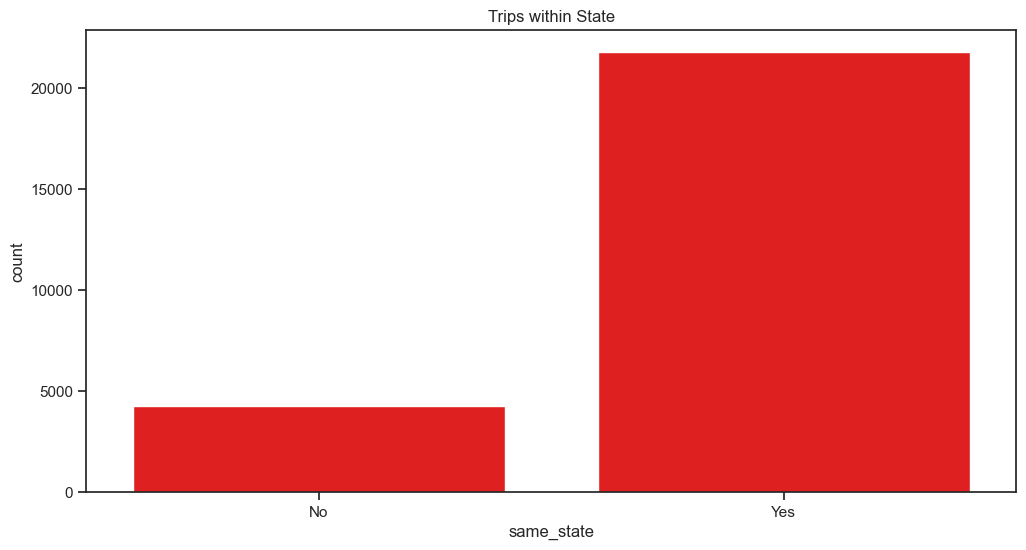

In [30]:
same_state_df = dd_grouped.apply(lambda row: "Yes" if row['source_state'] == row['destination_state'] else "No", axis=1).reset_index(name='same_state')

sns.countplot(x='same_state', data=same_state_df, color=palette[1])
plt.title("Trips within State")
plt.show()

* Most of the trip are intra-state deliveries

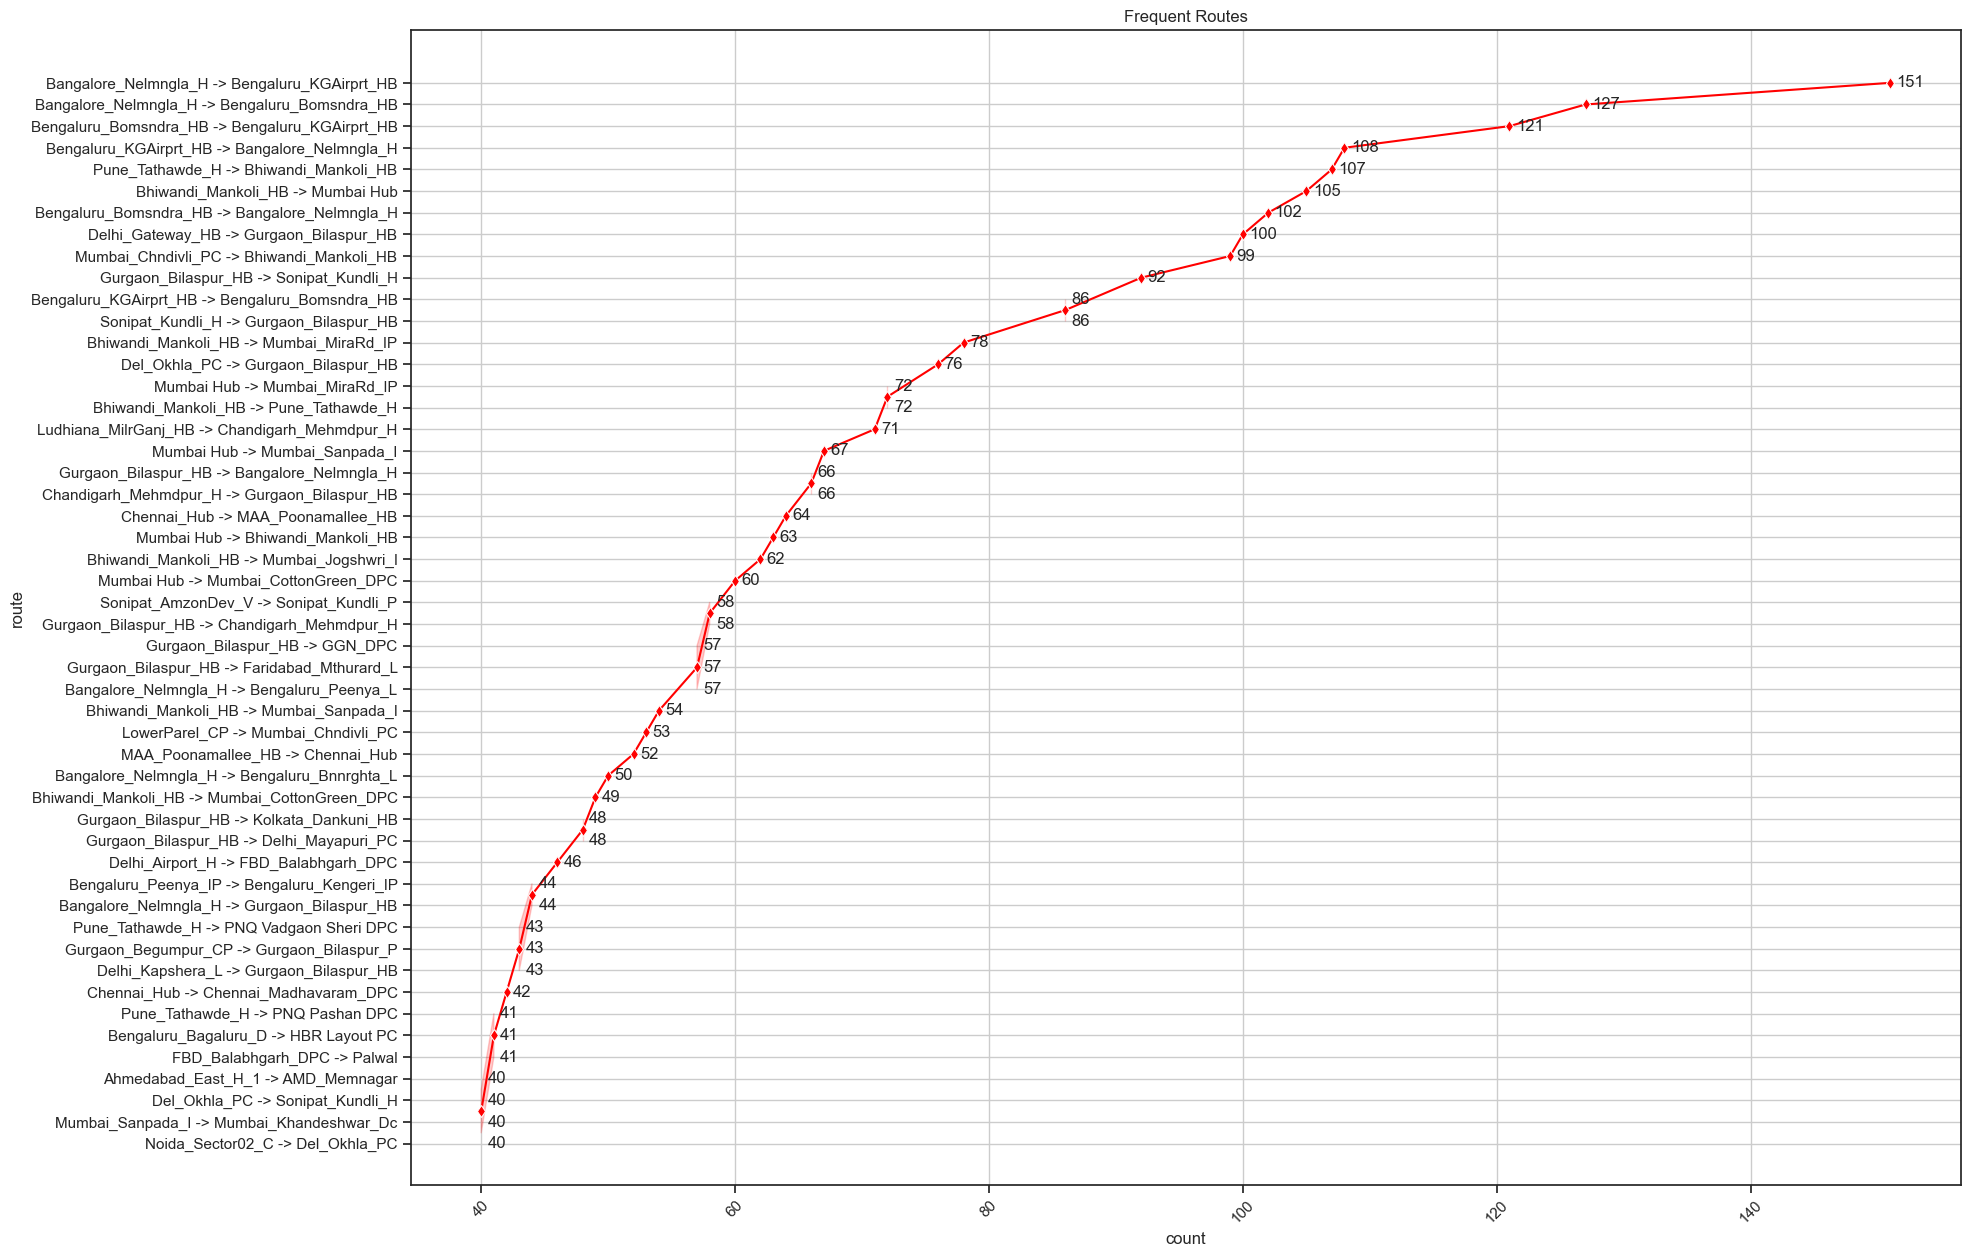

In [31]:
frequenct_routes = dd_grouped['source_point'].str.cat(dd_grouped['destination_point'], sep=" -> ").reset_index(name='route')
frequenct_routes = frequenct_routes['route'].value_counts().reset_index(name='count').head(50)
frequenct_routes

# line plot
plt.figure(figsize=(20, 15))
sns.lineplot(y='route', x='count', data=frequenct_routes, marker='d', color='r')
plt.xticks(rotation=45)
plt.title("Frequent Routes")
plt.grid()

for i, count in frequenct_routes['count'].items():
    plt.text(count+0.5, i, str(count), ha='left', va='center')

plt.show()

* Top 10 Busiest corridor

    - Bangalore_Nelmngla_H -> Bengaluru_KGAirprt_HB
    - Bangalore_Nelmngla_H -> Bengaluru_Bomsndra_HB
    - Bengaluru_Bomsndra_HB -> Bengaluru_KGAirprt_HB
    - Bengaluru_KGAirprt_HB -> Bangalore_Nelmngla_H
    - Pune_Tathawde_H -> Bhiwandi_Mankoli_HB
    - Bhiwandi_Mankoli_HB -> Mumbai Hub
    - Bengaluru_Bomsndra_HB -> Bangalore_Nelmngla_H
    - Delhi_Gateway_HB -> Gurgaon_Bilaspur_HB
    - Mumbai_Chndivli_PC -> Bhiwandi_Mankoli_HB
    - Gurgaon_Bilaspur_HB -> Sonipat_Kundli_H
    - Bengaluru_KGAirprt_HB -> Bengaluru_Bomsndra_HB

#### Most orders are coming from and delivery to? 

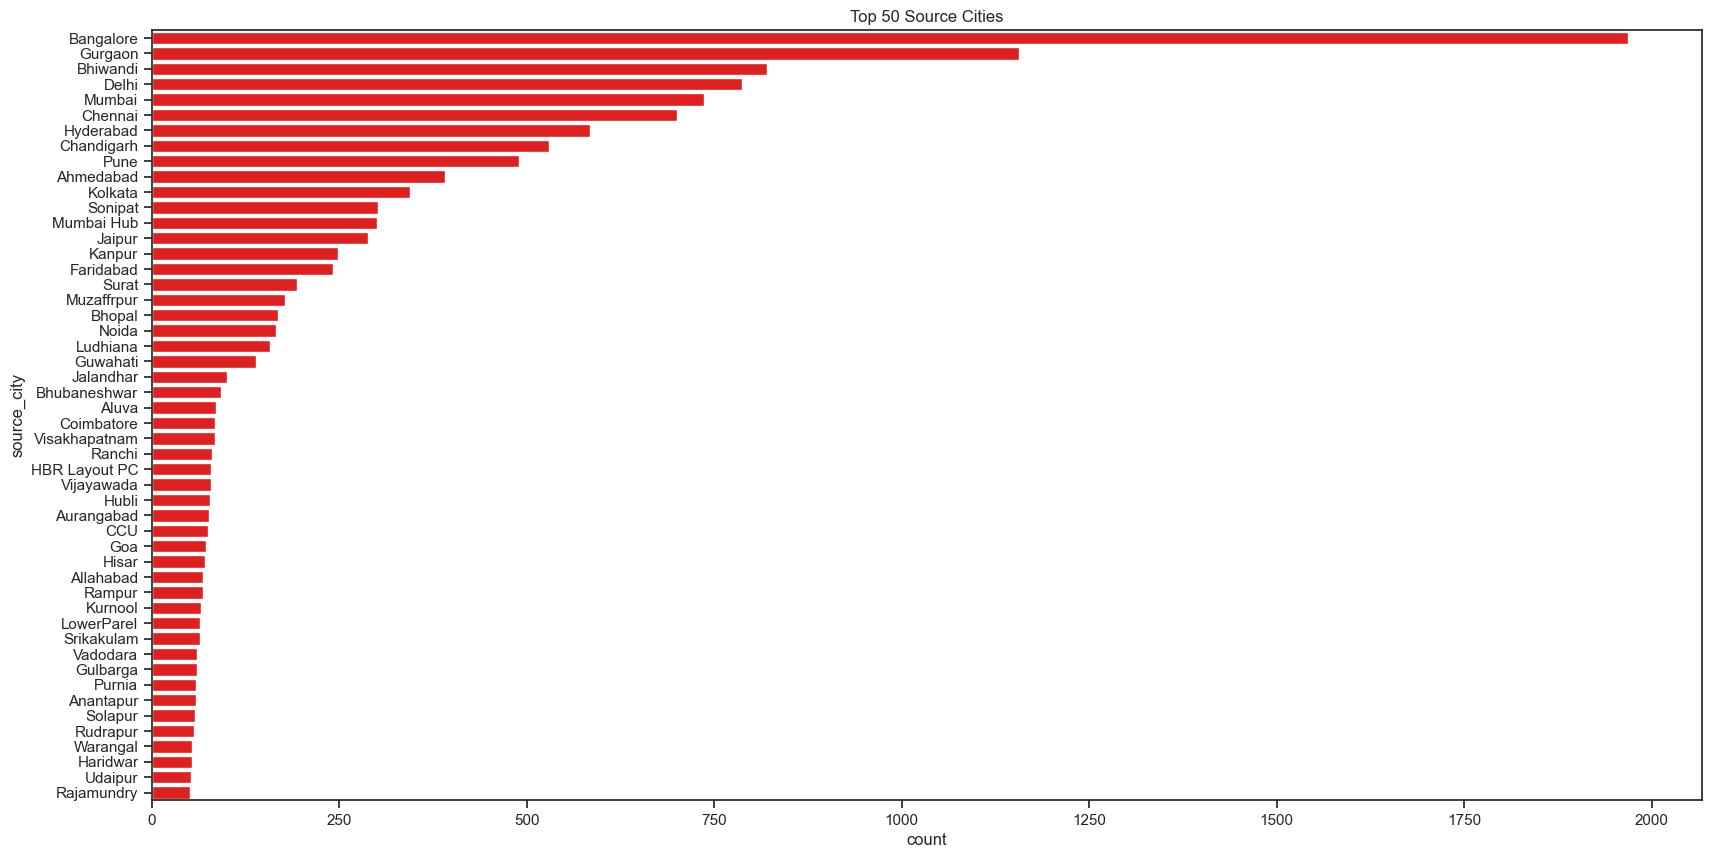

In [32]:
# bar plot for the top 50 source city 
frequenct_source_city = dd_grouped['source_city'].value_counts().reset_index(name='count').head(50)
plt.figure(figsize=(20, 10))
sns.barplot(y='source_city', x='count', data=frequenct_source_city, color='r')
plt.title("Top 50 Source Cities")
plt.show()

* Most of the orders are coming from: 
    - Bangalore
    - Gurgaon
    - Bhiwandi
    - Delhi
    - Mumbai
    - Chennai

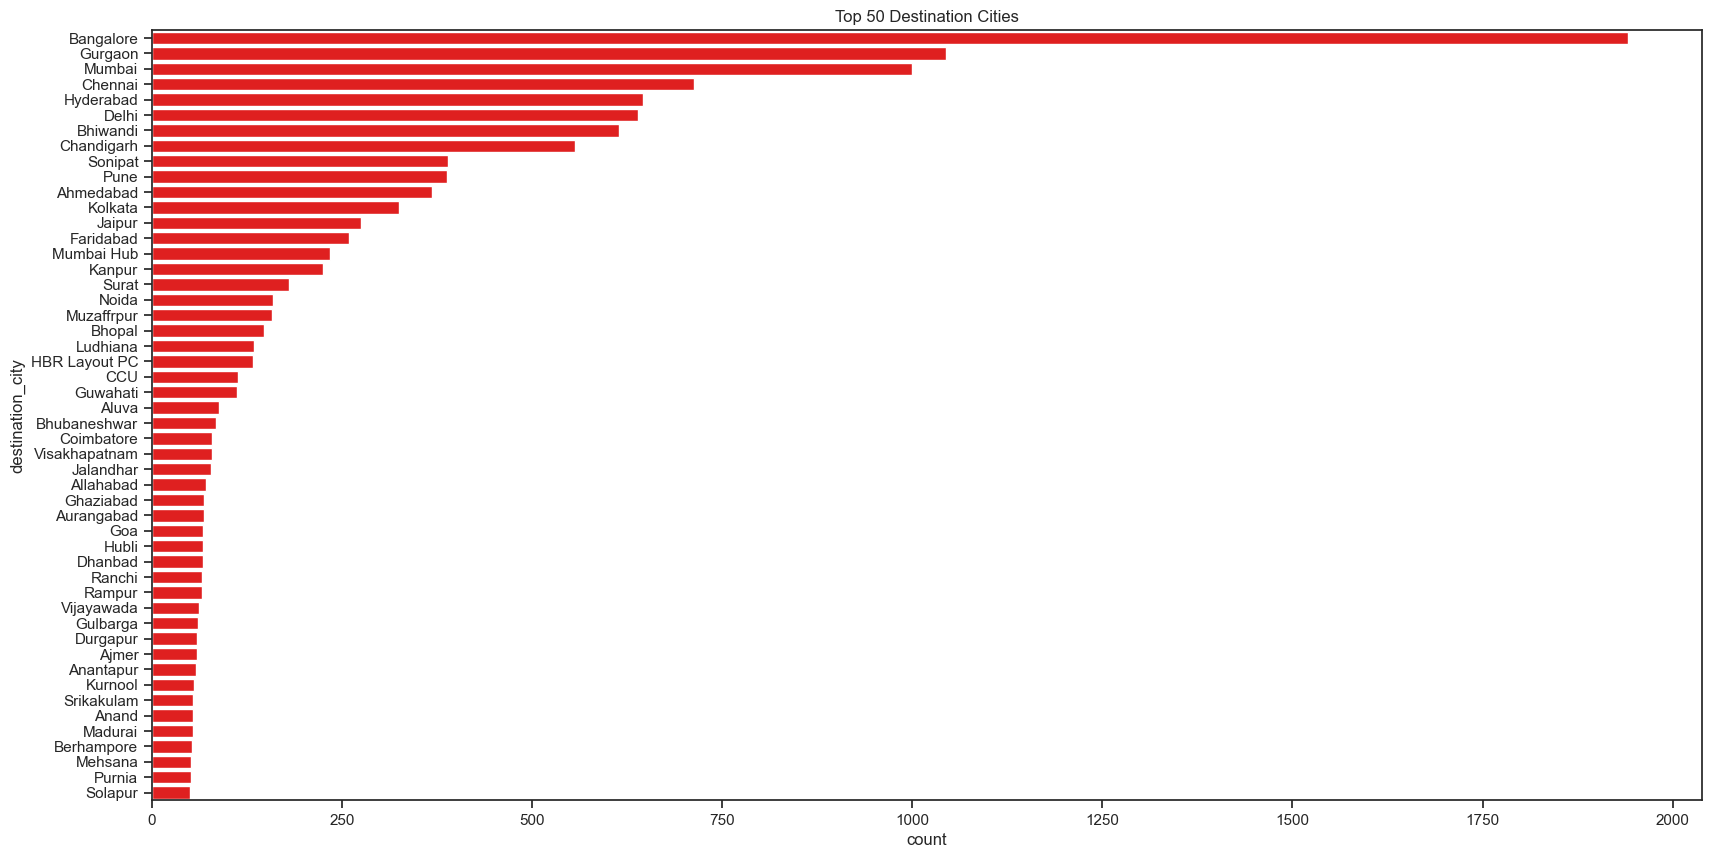

In [33]:
frequenct_destination_city = dd_grouped['destination_city'].value_counts().reset_index(name='count').head(50)
plt.figure(figsize=(20, 10))
sns.barplot(y='destination_city', x='count', data=frequenct_destination_city, color='r')
plt.title("Top 50 Destination Cities")
plt.show()

* Most of the Order are delivered to:
    - Bangalore
    -  Gurgaon
    -  Mumbai
    -  Chennai
    -  Hyderabad
    -  Delhi


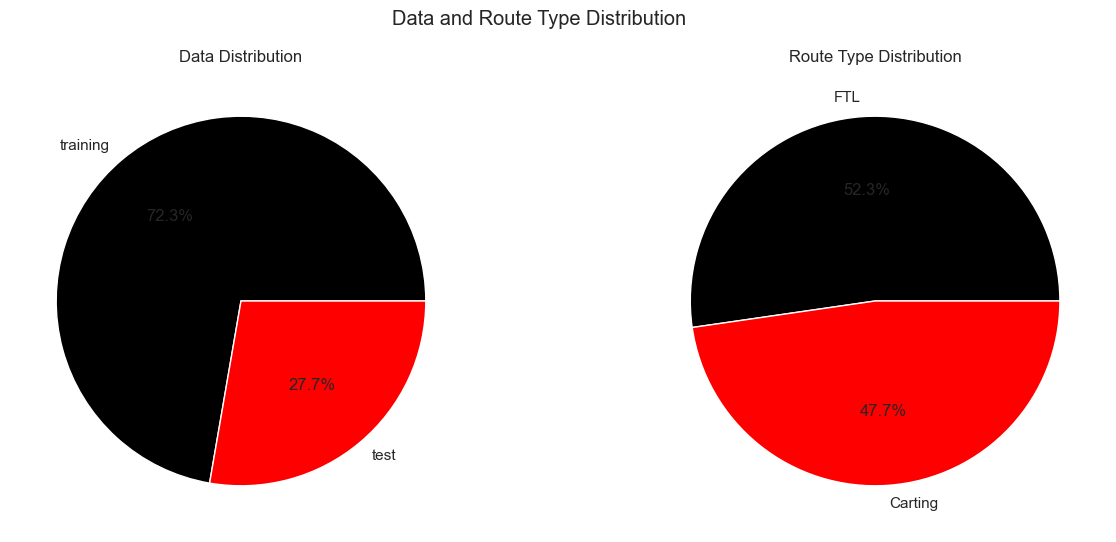

In [34]:
plt.figure(figsize=(15, 6))
plt.suptitle("Data and Route Type Distribution")

plt.subplot(1, 2, 1)
plt.pie(dd_grouped['data'].value_counts(), labels = dd_grouped['data'].value_counts().index, autopct='%1.1f%%')
plt.title("Data Distribution")

plt.subplot(1, 2, 2)
plt.pie(dd_grouped['route_type'].value_counts(), labels = dd_grouped['route_type'].value_counts().index, autopct='%1.1f%%')
plt.title("Route Type Distribution")

plt.show()

* The Dataset has 72% data for Training and ~27% of data for Test
* Route Type distribution seems to have similar ratio of data's

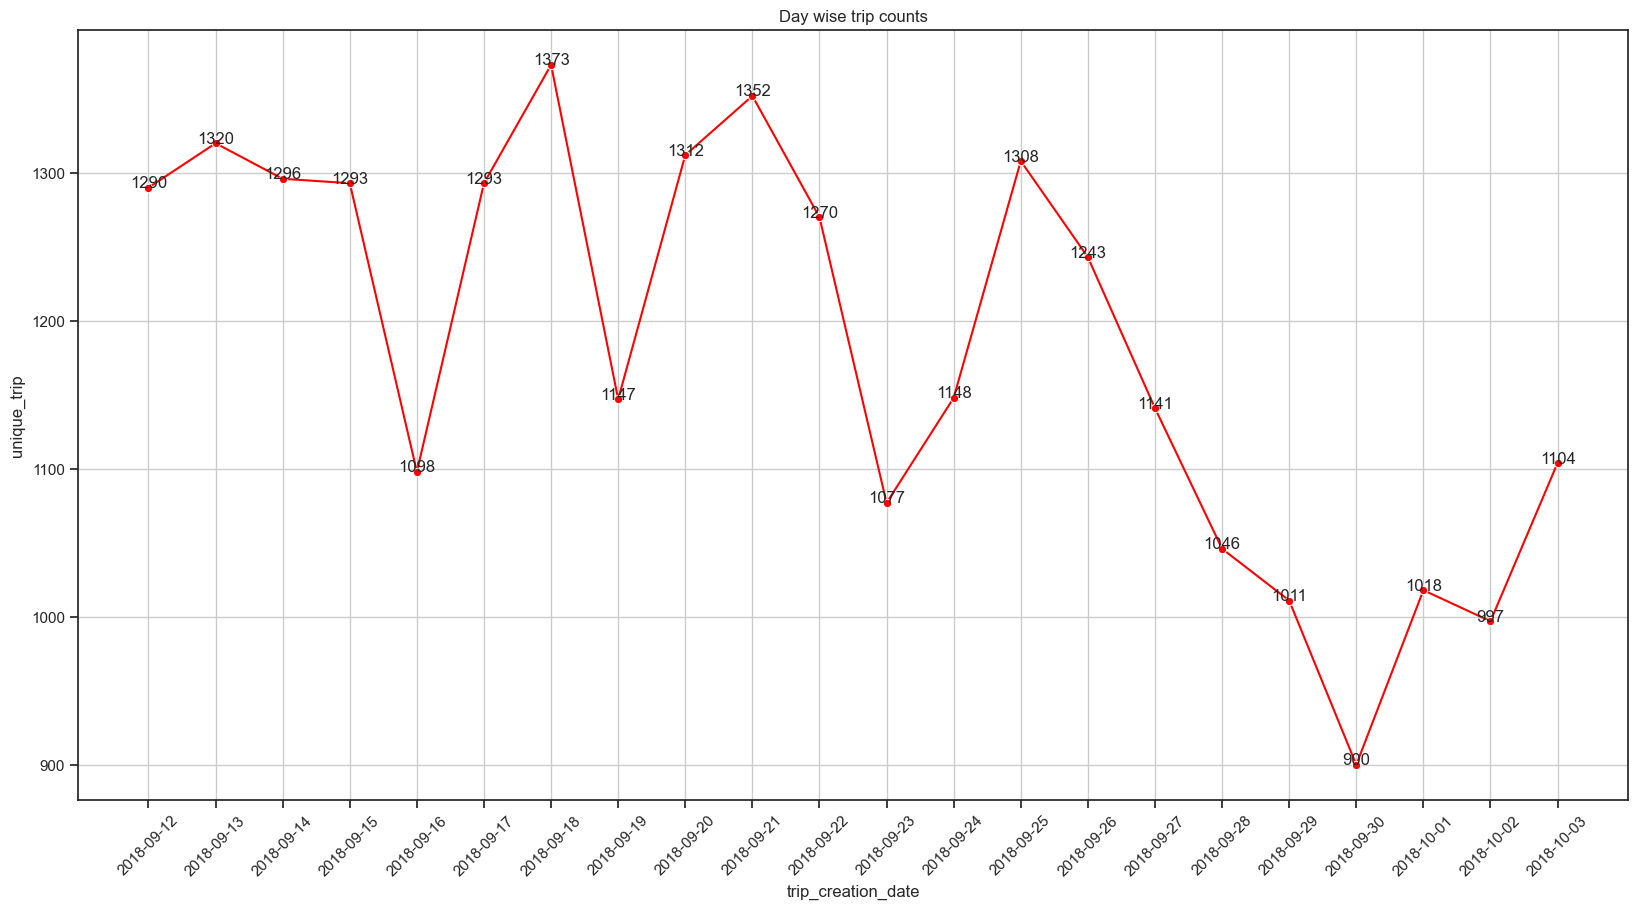

In [35]:
plt_data = dd_grouped.groupby('trip_creation_date')['unique_trip'].count().reset_index()
plt_data['trip_creation_date'] = pd.to_datetime(plt_data['trip_creation_date'])

plt.figure(figsize=(20, 10))
sns.lineplot(x='trip_creation_date', y='unique_trip', data=plt_data, marker='o', color='r')
plt.title("Day wise trip counts")

plt.xticks(plt_data['trip_creation_date'], rotation=45)
plt.grid()

for i, count in enumerate(plt_data['unique_trip']):
    plt.text(plt_data['trip_creation_date'][i], count, count, ha='center')

plt.show()

* Most of the trips are created in the mid of the month.

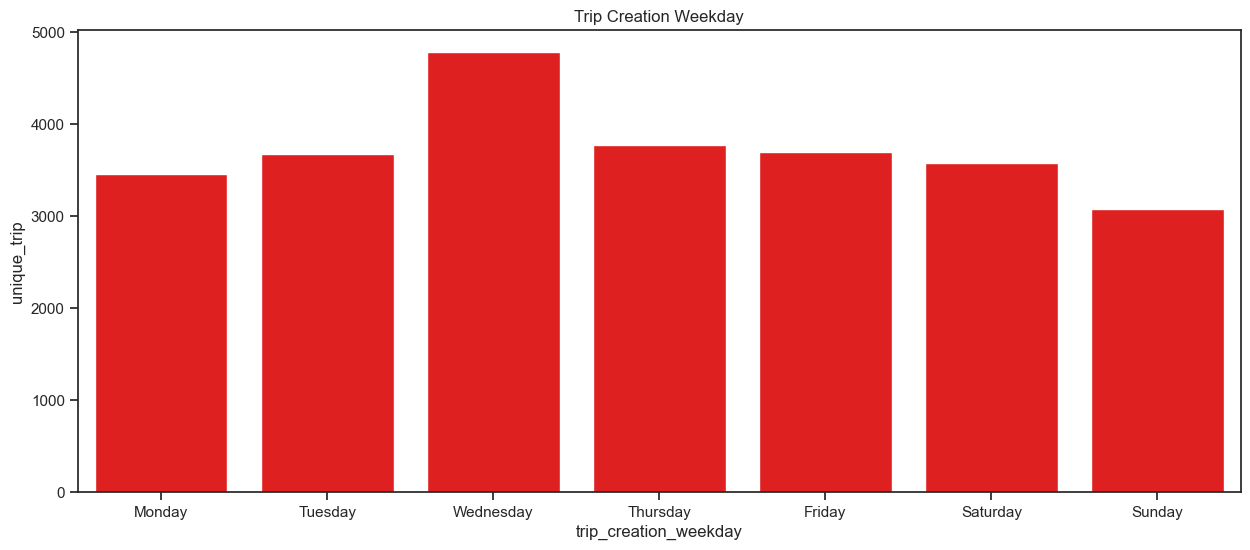

In [36]:
plt_data = dd_grouped.groupby('trip_creation_weekday')['unique_trip'].count().reset_index()
plt_data['trip_creation_weekday'] = plt_data['trip_creation_weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

plt.figure(figsize=(15, 6))
sns.barplot(x='trip_creation_weekday', y='unique_trip', data=plt_data, color='r')
plt.title("Trip Creation Weekday")
plt.show()

* Wednesday has more one of trips compare to other days of the week

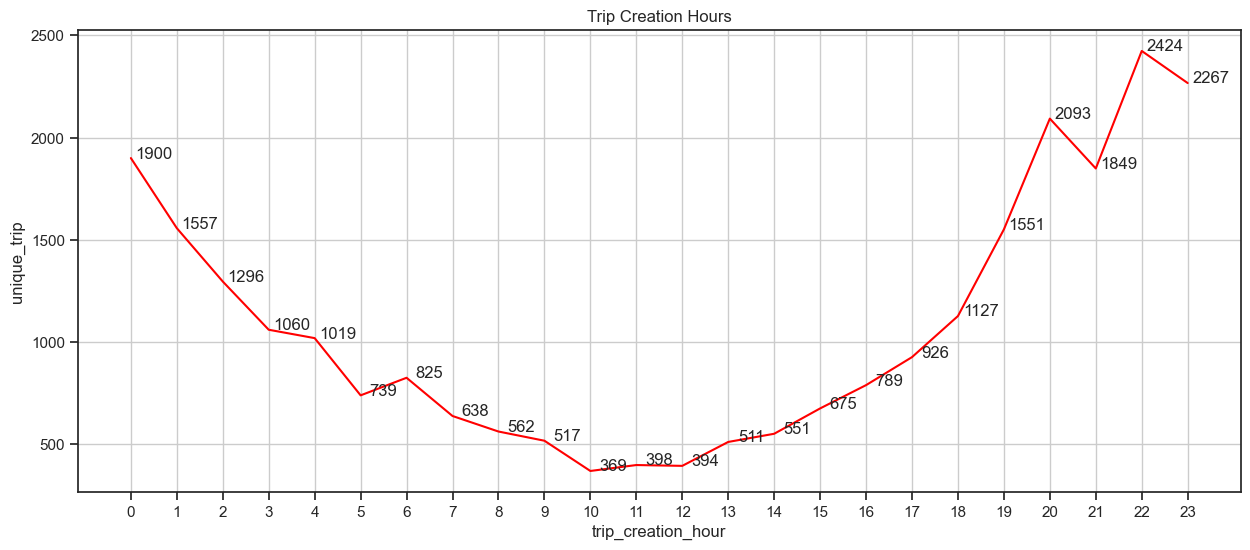

In [37]:
plt_data = dd_grouped.groupby('trip_creation_hour')['unique_trip'].count().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='trip_creation_hour', y='unique_trip', data=plt_data, color='r', markers='o')
plt.title("Trip Creation Hours")

plt.xticks(plt_data['trip_creation_hour'])
plt.grid()

for i, count in enumerate(plt_data['unique_trip']):
    plt.text(plt_data['trip_creation_hour'][i]+0.5, count, count, ha='center')


plt.show()


*  Number of trips start increasing after the noon, becomes maximum at 10 P.M and then start
decreasing.


---

### In-depth Analysis 🔬

In [38]:
dd_grouped.head()

,unique_trip,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_point,source_city,source_code,destination_state,destination_point,destination_city,destination_code,trip_creation_date,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week,trip_duration
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.750000,732.0,329.0,446.500000,728.0,534.0,670.593750,Uttar Pradesh,Kanpur_Central_H_6,Kanpur,Central_H_6,Haryana,Gurgaon_Bilaspur_HB,Gurgaon,Bilaspur_HB,2018-09-12,12,0,2,37,0 days 21:00:36.265275
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,441.000000,830.0,388.0,545.000000,820.0,474.0,649.859375,Madhya Pradesh,Bhopal_Trnsport_H,Bhopal,Trnsport_H,Uttar Pradesh,Kanpur_Central_H_6,Kanpur,Central_H_6,2018-09-12,12,0,2,37,0 days 16:39:30.322728
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.640625,47.0,26.0,28.203125,46.0,26.0,28.203125,Karnataka,Doddablpur_ChikaDPP_D,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,Chikblapur,ShntiSgr_D,2018-09-12,12,0,2,37,0 days 00:58:49.943264
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.531250,96.0,42.0,56.906250,95.0,39.0,55.986328,Karnataka,Tumkur_Veersagr_I,Tumkur,Veersagr_I,Karnataka,Doddablpur_ChikaDPP_D,Doddablpur,ChikaDPP_D,2018-09-12,12,0,2,37,0 days 02:02:46.769161
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.500000,611.0,212.0,281.250000,608.0,231.0,317.718750,Haryana,Gurgaon_Bilaspur_HB,Gurgaon,Bilaspur_HB,Punjab,Chandigarh_Mehmdpur_H,Chandigarh,Mehmdpur_H,2018-09-12,12,0,2,37,0 days 13:54:38.335721


In [39]:
agg_dict = {
    'data':'first',
    'trip_creation_time': 'first',
    'route_type': 'first',
    'source_name': 'first',
    'destination_name': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'source_state': 'first',
    'source_city': 'first',
    'source_code': 'first',
    'destination_state': 'last',
    'destination_city': 'last',
    'destination_code': 'last',
    'trip_creation_date': 'first',
    'trip_creation_day': 'first',
    'trip_creation_hour': 'first',
    'trip_creation_weekday': 'first',
    'trip_creation_week': 'first',
    'trip_duration': 'sum'
}

dd_trips = dd_grouped.groupby(by="trip_uuid", as_index=False).agg(agg_dict)

In [40]:
dd_trips.head()

,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,source_code,destination_state,destination_city,destination_code,trip_creation_date,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week,trip_duration
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,2259.0,824.750000,1562.0,717.0,991.500000,1548.0,1008.0,1320.453125,Uttar Pradesh,Kanpur,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,2018-09-12,12.0,0.0,2.0,37,1 days 13:40:06.588003
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,180.0,73.171875,143.0,68.0,85.109375,141.0,65.0,84.189453,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,2018-09-12,12.0,0.0,2.0,37,0 days 03:01:36.712425
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,3934.0,1927.500000,3347.0,1740.0,2353.250000,3308.0,1941.0,2545.265625,Haryana,Gurgaon,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB,2018-09-12,12.0,0.0,2.0,37,2 days 17:34:21.751204
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.171875,59.0,15.0,19.687500,59.0,16.0,19.878906,Maharashtra,Mumbai Hub,,Maharashtra,Mumbai,MiraRd_IP,2018-09-12,12.0,0.0,2.0,37,0 days 01:40:29.696112
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,717.0,127.437500,341.0,117.0,146.781250,340.0,115.0,146.792969,Karnataka,Bellary,Dc,Karnataka,Sandur,WrdN1DPP_D,2018-09-12,12.0,0.0,2.0,37,0 days 11:58:20.942506


In [41]:
numeric_cols = dd_trips.select_dtypes(include=['float16', 'float32']).columns

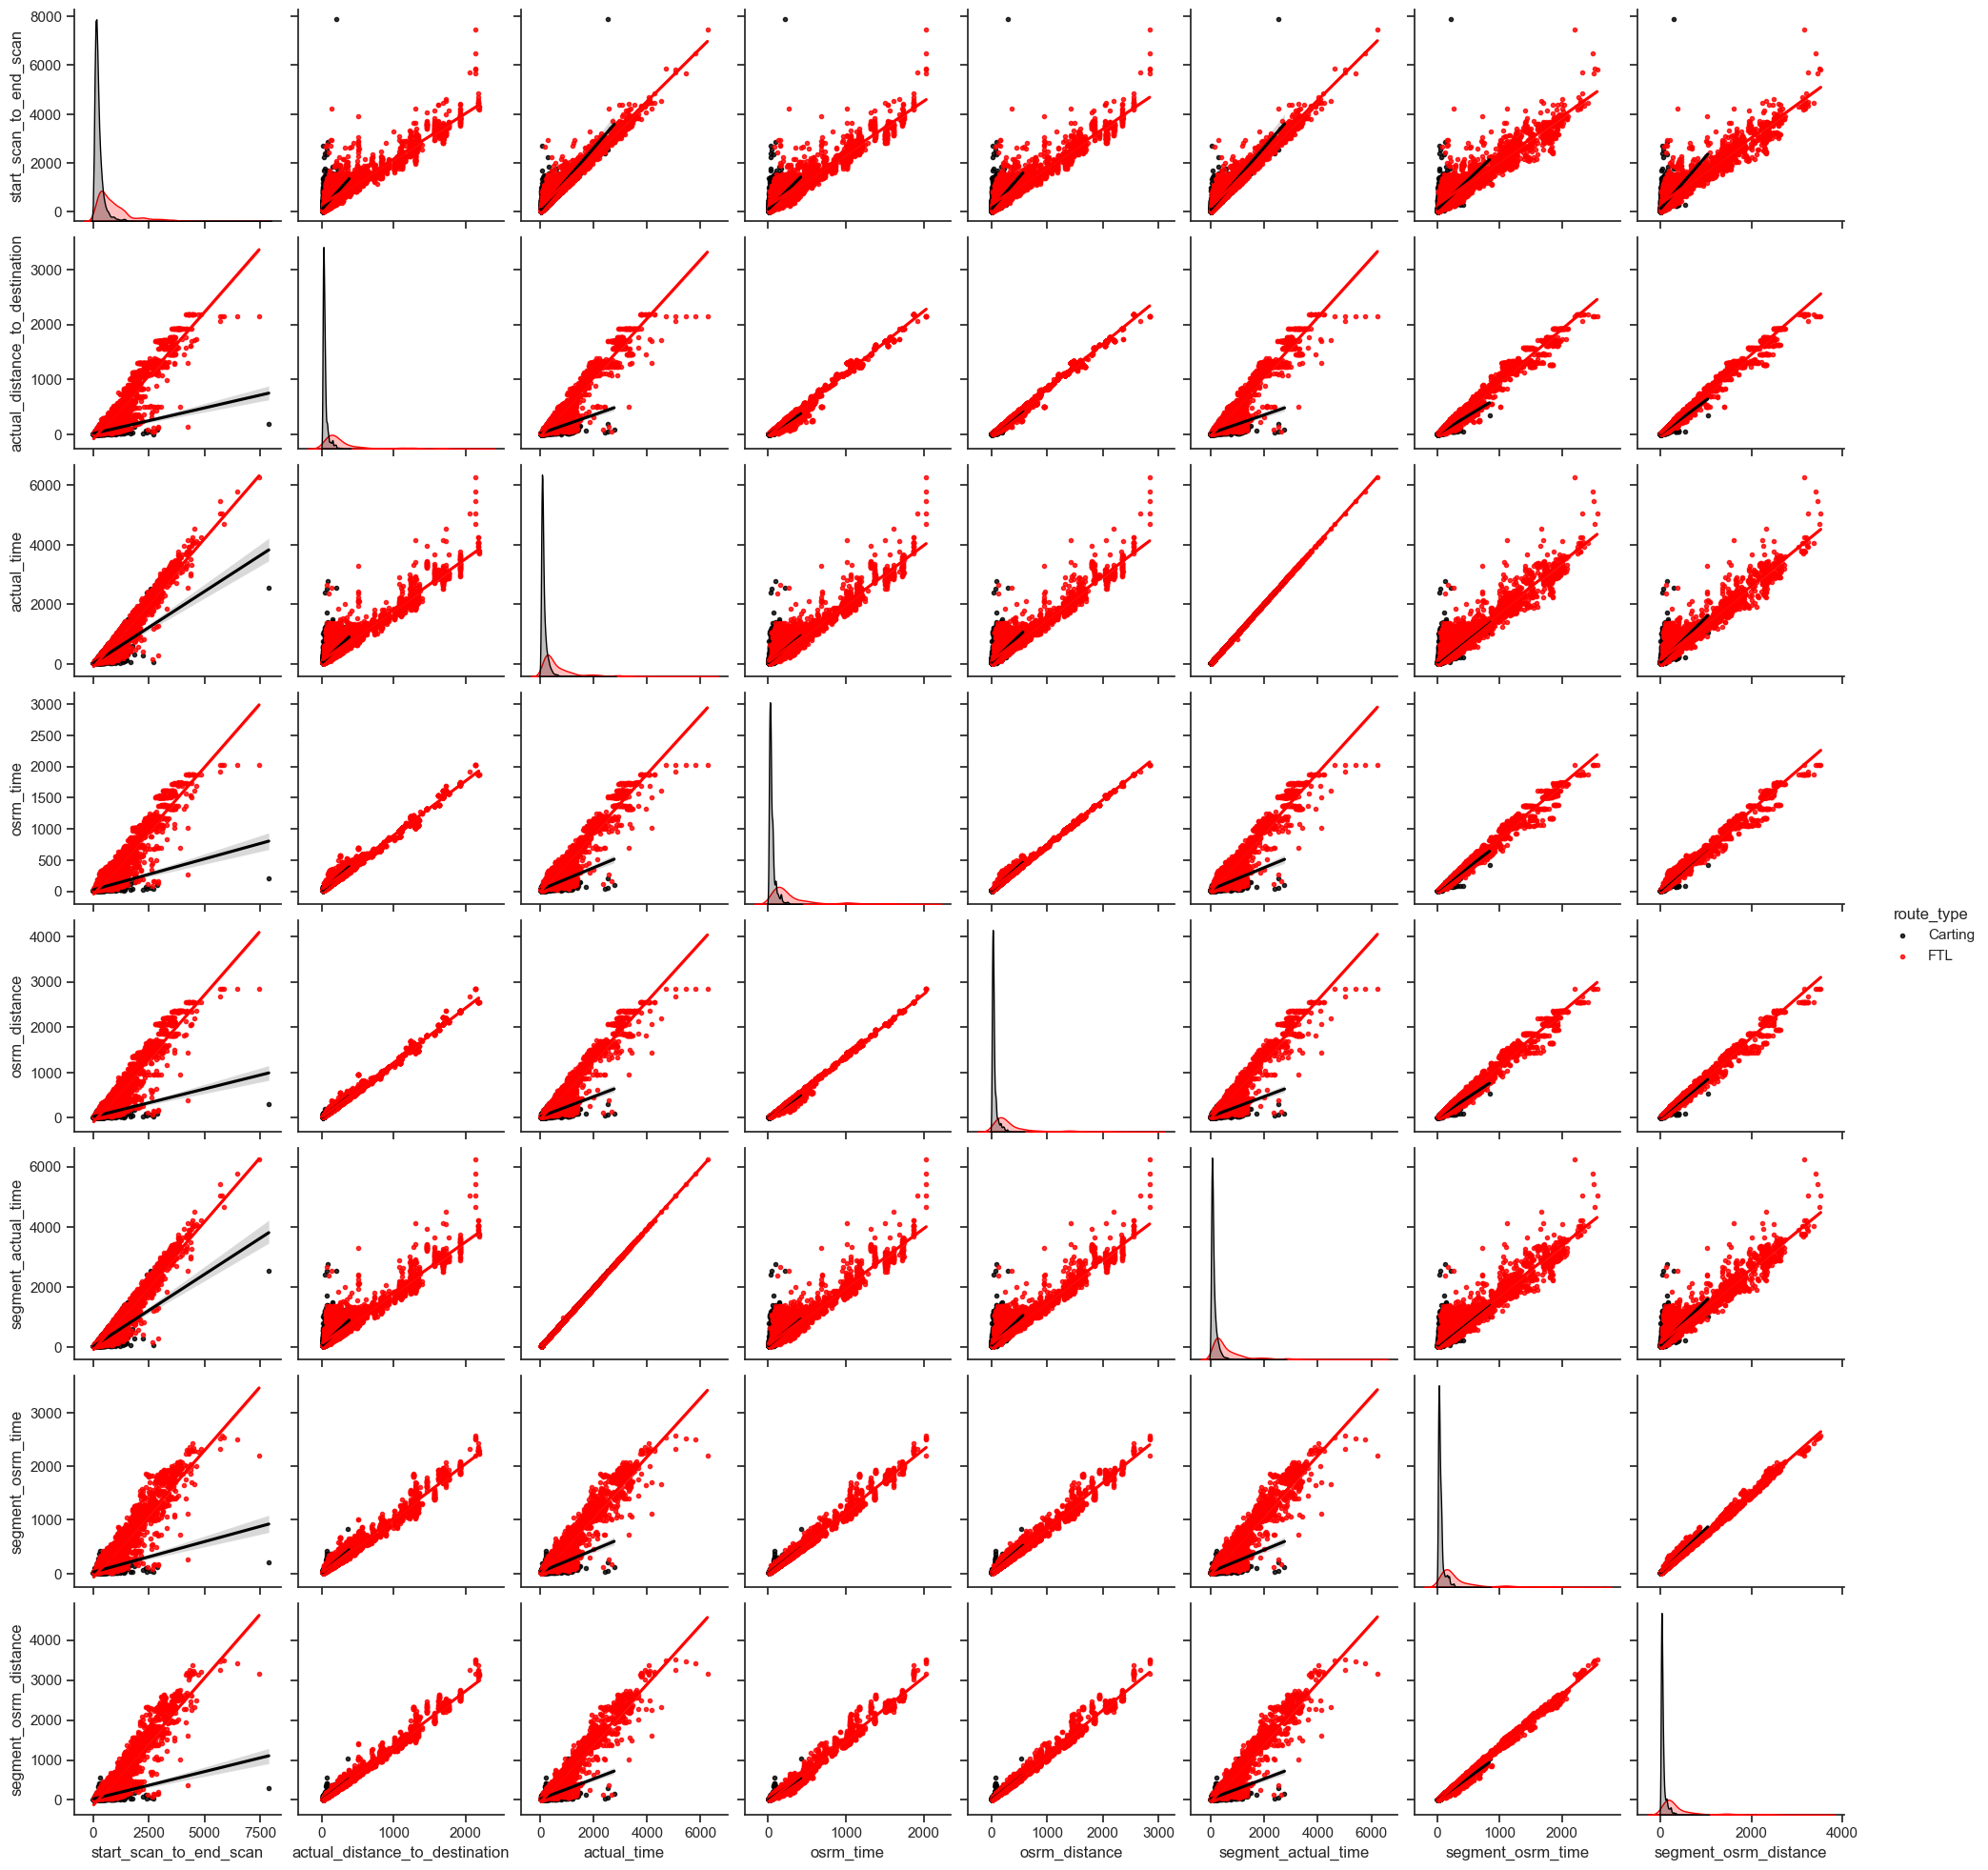

In [42]:
sns.pairplot(data = dd_trips,
 vars = numeric_cols,
 kind = 'reg',
 hue = 'route_type',
 markers = '.')
plt.plot()
plt.show()

In [43]:
df_corr = dd_trips[numeric_cols].corr()
df_corr

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
start_scan_to_end_scan,1.000000,0.919262,0.961725,0.927717,0.925342,0.961748,0.919690,0.920326
actual_distance_to_destination,0.919262,1.000000,0.954023,0.993579,0.997276,0.953092,0.987587,0.993094
actual_time,0.961725,0.954023,1.000000,0.958931,0.959503,0.999989,0.954207,0.957256
osrm_time,0.927717,0.993579,0.958931,1.000000,0.997591,0.958108,0.993287,0.991639
osrm_distance,0.925342,0.997276,0.959503,0.997591,1.000000,0.958648,0.991830,0.994726
segment_actual_time,0.961748,0.953092,0.999989,0.958108,0.958648,1.000000,0.953380,0.956401
segment_osrm_time,0.919690,0.987587,0.954207,0.993287,0.991830,0.953380,1.000000,0.996105
segment_osrm_distance,0.920326,0.993094,0.957256,0.991639,0.994726,0.956401,0.996105,1.000000


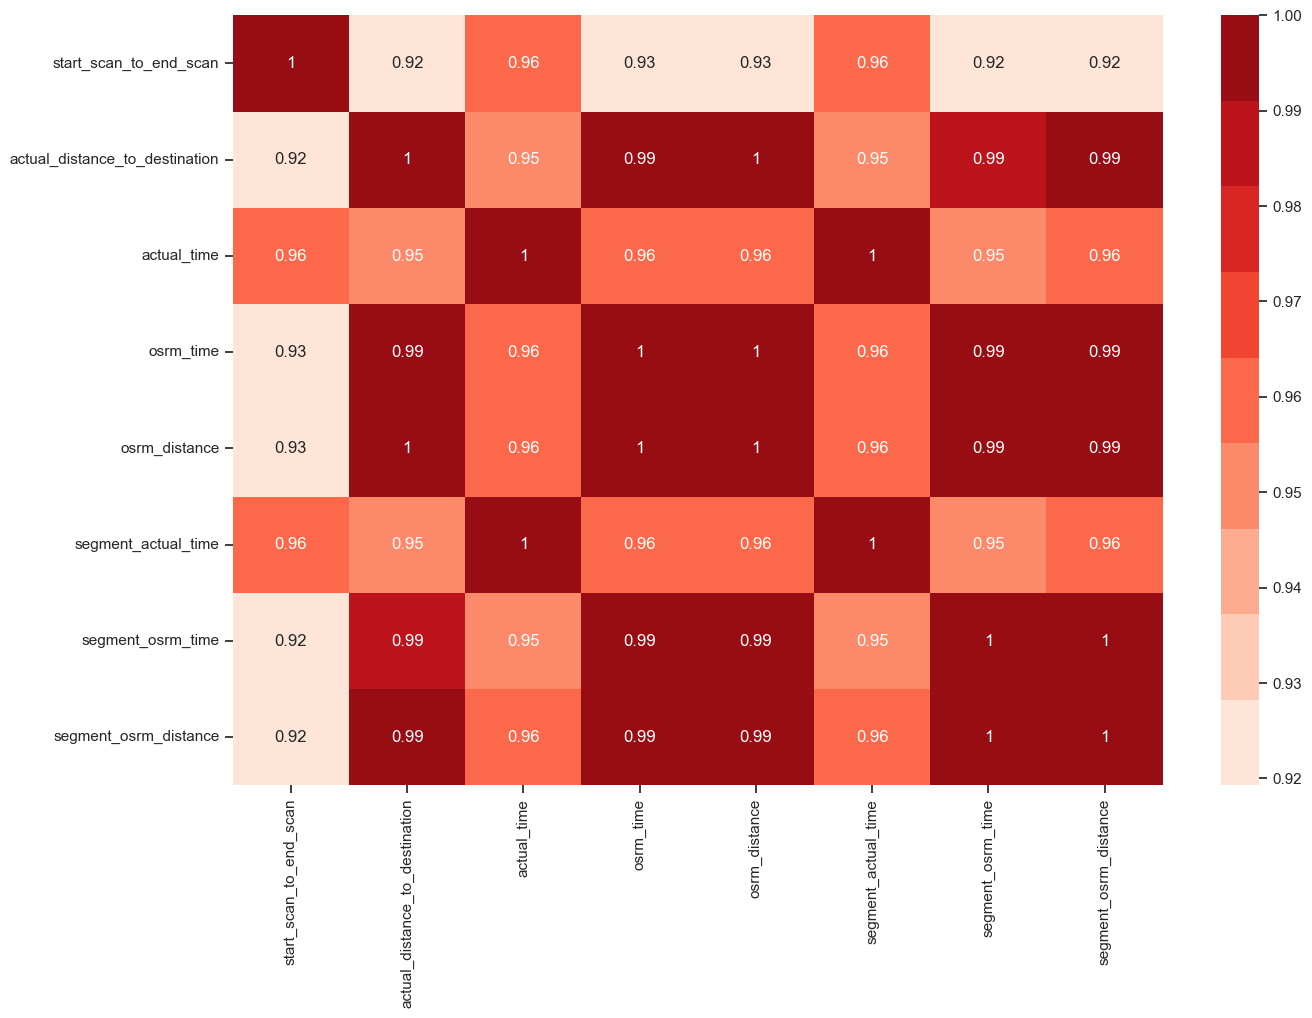

In [44]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, cmap=sns.color_palette("Reds", n_colors=9))
plt.show()

* Seems all the numerical data are highly correlated

In [45]:
dd_trips.skew(numeric_only = True)

start_scan_to_end_scan            2.895575
actual_distance_to_destination    3.567667
actual_time                       3.377693
osrm_time                             <NA>
osrm_distance                     3.557269
segment_actual_time               3.374549
segment_osrm_time                 3.605595
segment_osrm_distance             3.717643
trip_creation_day                -0.693341
trip_creation_hour                -0.20518
trip_creation_weekday             0.065151
trip_creation_week                0.187824
dtype: Float64

*  Most of the data are Right-Skewed.

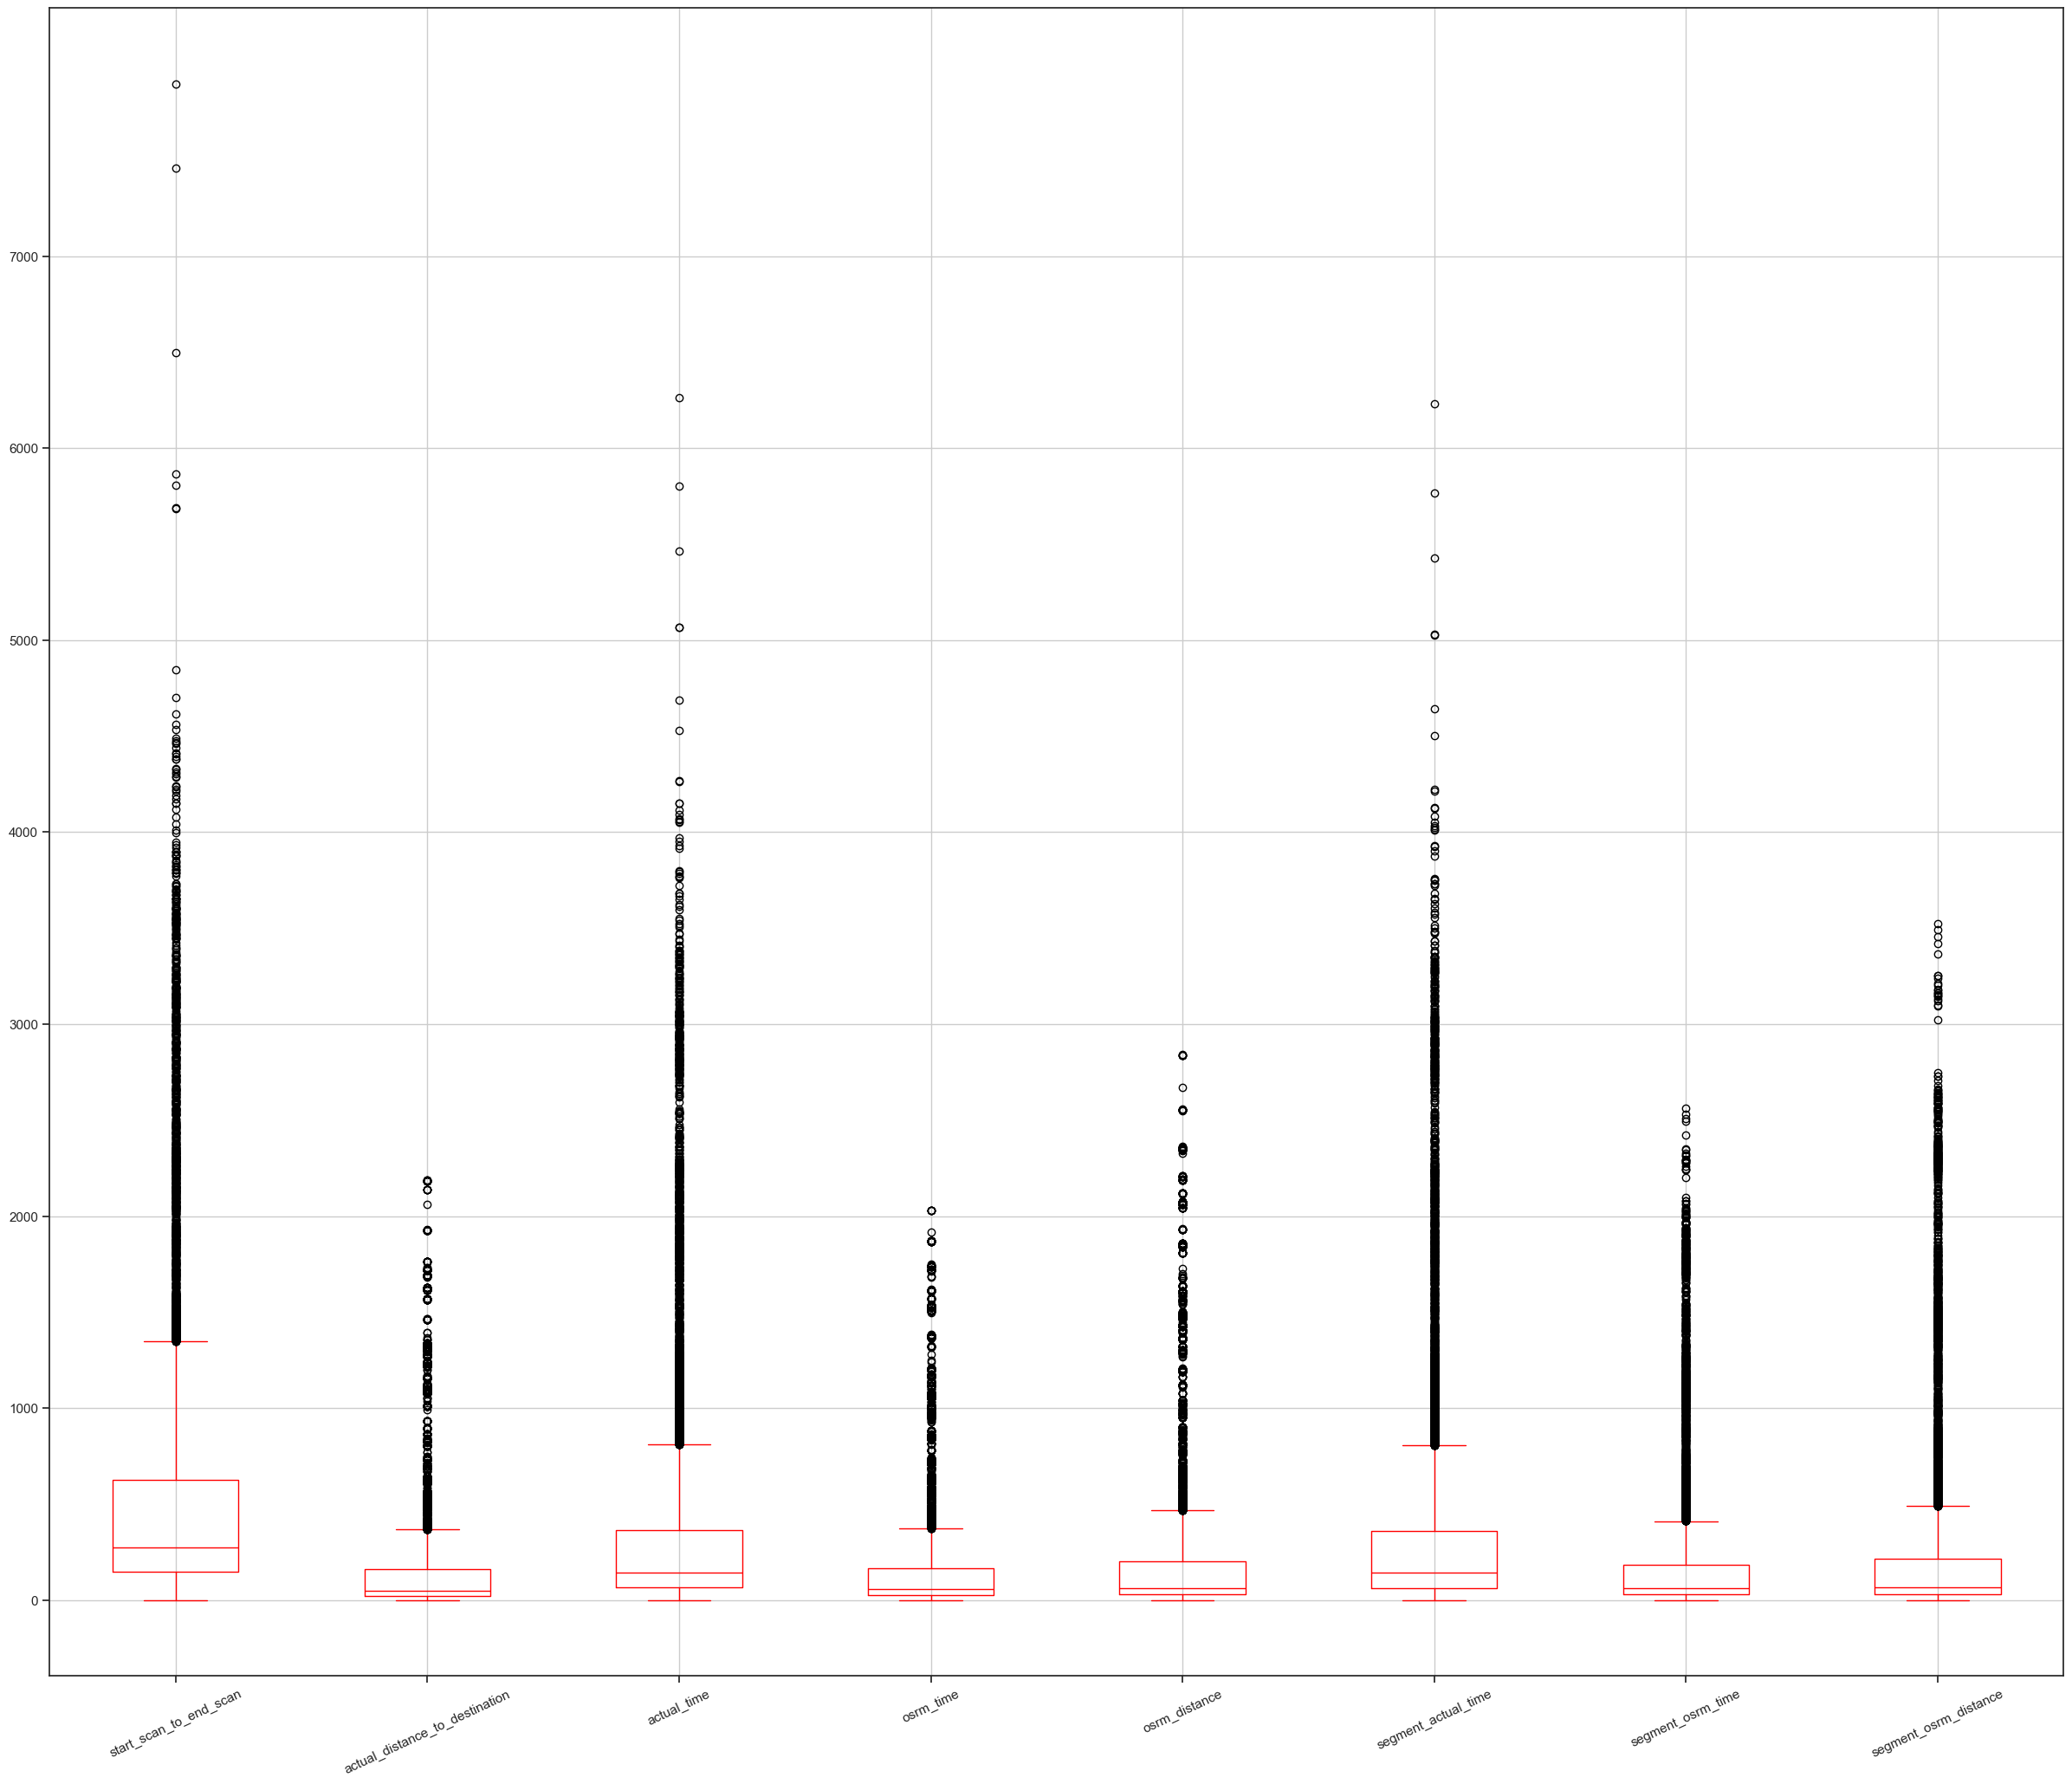

In [46]:
plt.figure(figsize=(30, 25))
dd_trips[numeric_cols].boxplot(rot=25, figsize=(35,20), color = 'r')

max_y = dd_trips[numeric_cols].max().max()
yticks = np.arange(0, max_y, 1000)

plt.yticks(yticks)
plt.show()

* The outliers present in our sample data.

In [47]:
for col in numeric_cols:
    Q1 = np.quantile(dd_trips[col], 0.25)
    Q3 = np.quantile(dd_trips[col], 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = dd_trips.loc[(dd_trips[col] < LB) | (dd_trips[col] > UB)]
    print('Column :', col)
    print(f'\t Q1 : {round(Q1,3)}\n\t Q3 : {round(Q3,3)}\n\t IQR : {round(IQR,3)}\n\t LB : {round(LB,3)}\n\t UB : {round(UB,3)}\n\t Number of outliers : {outliers.shape[0]}')
    print("- -"*20)

Column : start_scan_to_end_scan
	 Q1 : 147.0
	 Q3 : 628.0
	 IQR : 481.0
	 LB : -574.5
	 UB : 1349.5
	 Number of outliers : 1301
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Column : actual_distance_to_destination
	 Q1 : 22.328
	 Q3 : 161.562
	 IQR : 139.234
	 LB : -186.523
	 UB : 370.414
	 Number of outliers : 1477
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Column : actual_time
	 Q1 : 66.0
	 Q3 : 364.0
	 IQR : 298.0
	 LB : -381.0
	 UB : 811.0
	 Number of outliers : 1660
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Column : osrm_time
	 Q1 : 29.0
	 Q3 : 167.0
	 IQR : 138.0
	 LB : -178.0
	 UB : 374.0
	 Number of outliers : 1510
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Column : osrm_distance
	 Q1 : 30.203
	 Q3 : 204.969
	 IQR : 174.766
	 LB : -231.945
	 UB : 467.117
	 Number of outliers : 1531
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Column : segment_actual_time
	 Q1 : 65.0
	 Q3 : 362.0
	 IQR : 297.0


#### Outlier Treatment
* Removing the outliers, but some outliers represent natural variations in the population

In [48]:
# Reduce the outliers

for col in numeric_cols:
    Q1 = np.quantile(dd_trips[col], 0.25)
    Q3 = np.quantile(dd_trips[col], 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    dd_trips[col] = np.where(dd_trips[col] < LB, LB, dd_trips[col])
    dd_trips[col] = np.where(dd_trips[col] > UB, UB, dd_trips[col])

In [49]:
dd_trips.skew(numeric_only = True)

start_scan_to_end_scan            1.161804
actual_distance_to_destination    1.276377
actual_time                       1.167957
osrm_time                             <NA>
osrm_distance                     1.273736
segment_actual_time               1.172869
segment_osrm_time                 1.242727
segment_osrm_distance             1.260448
trip_creation_day                -0.693341
trip_creation_hour                -0.20518
trip_creation_weekday             0.065151
trip_creation_week                0.187824
dtype: Float64

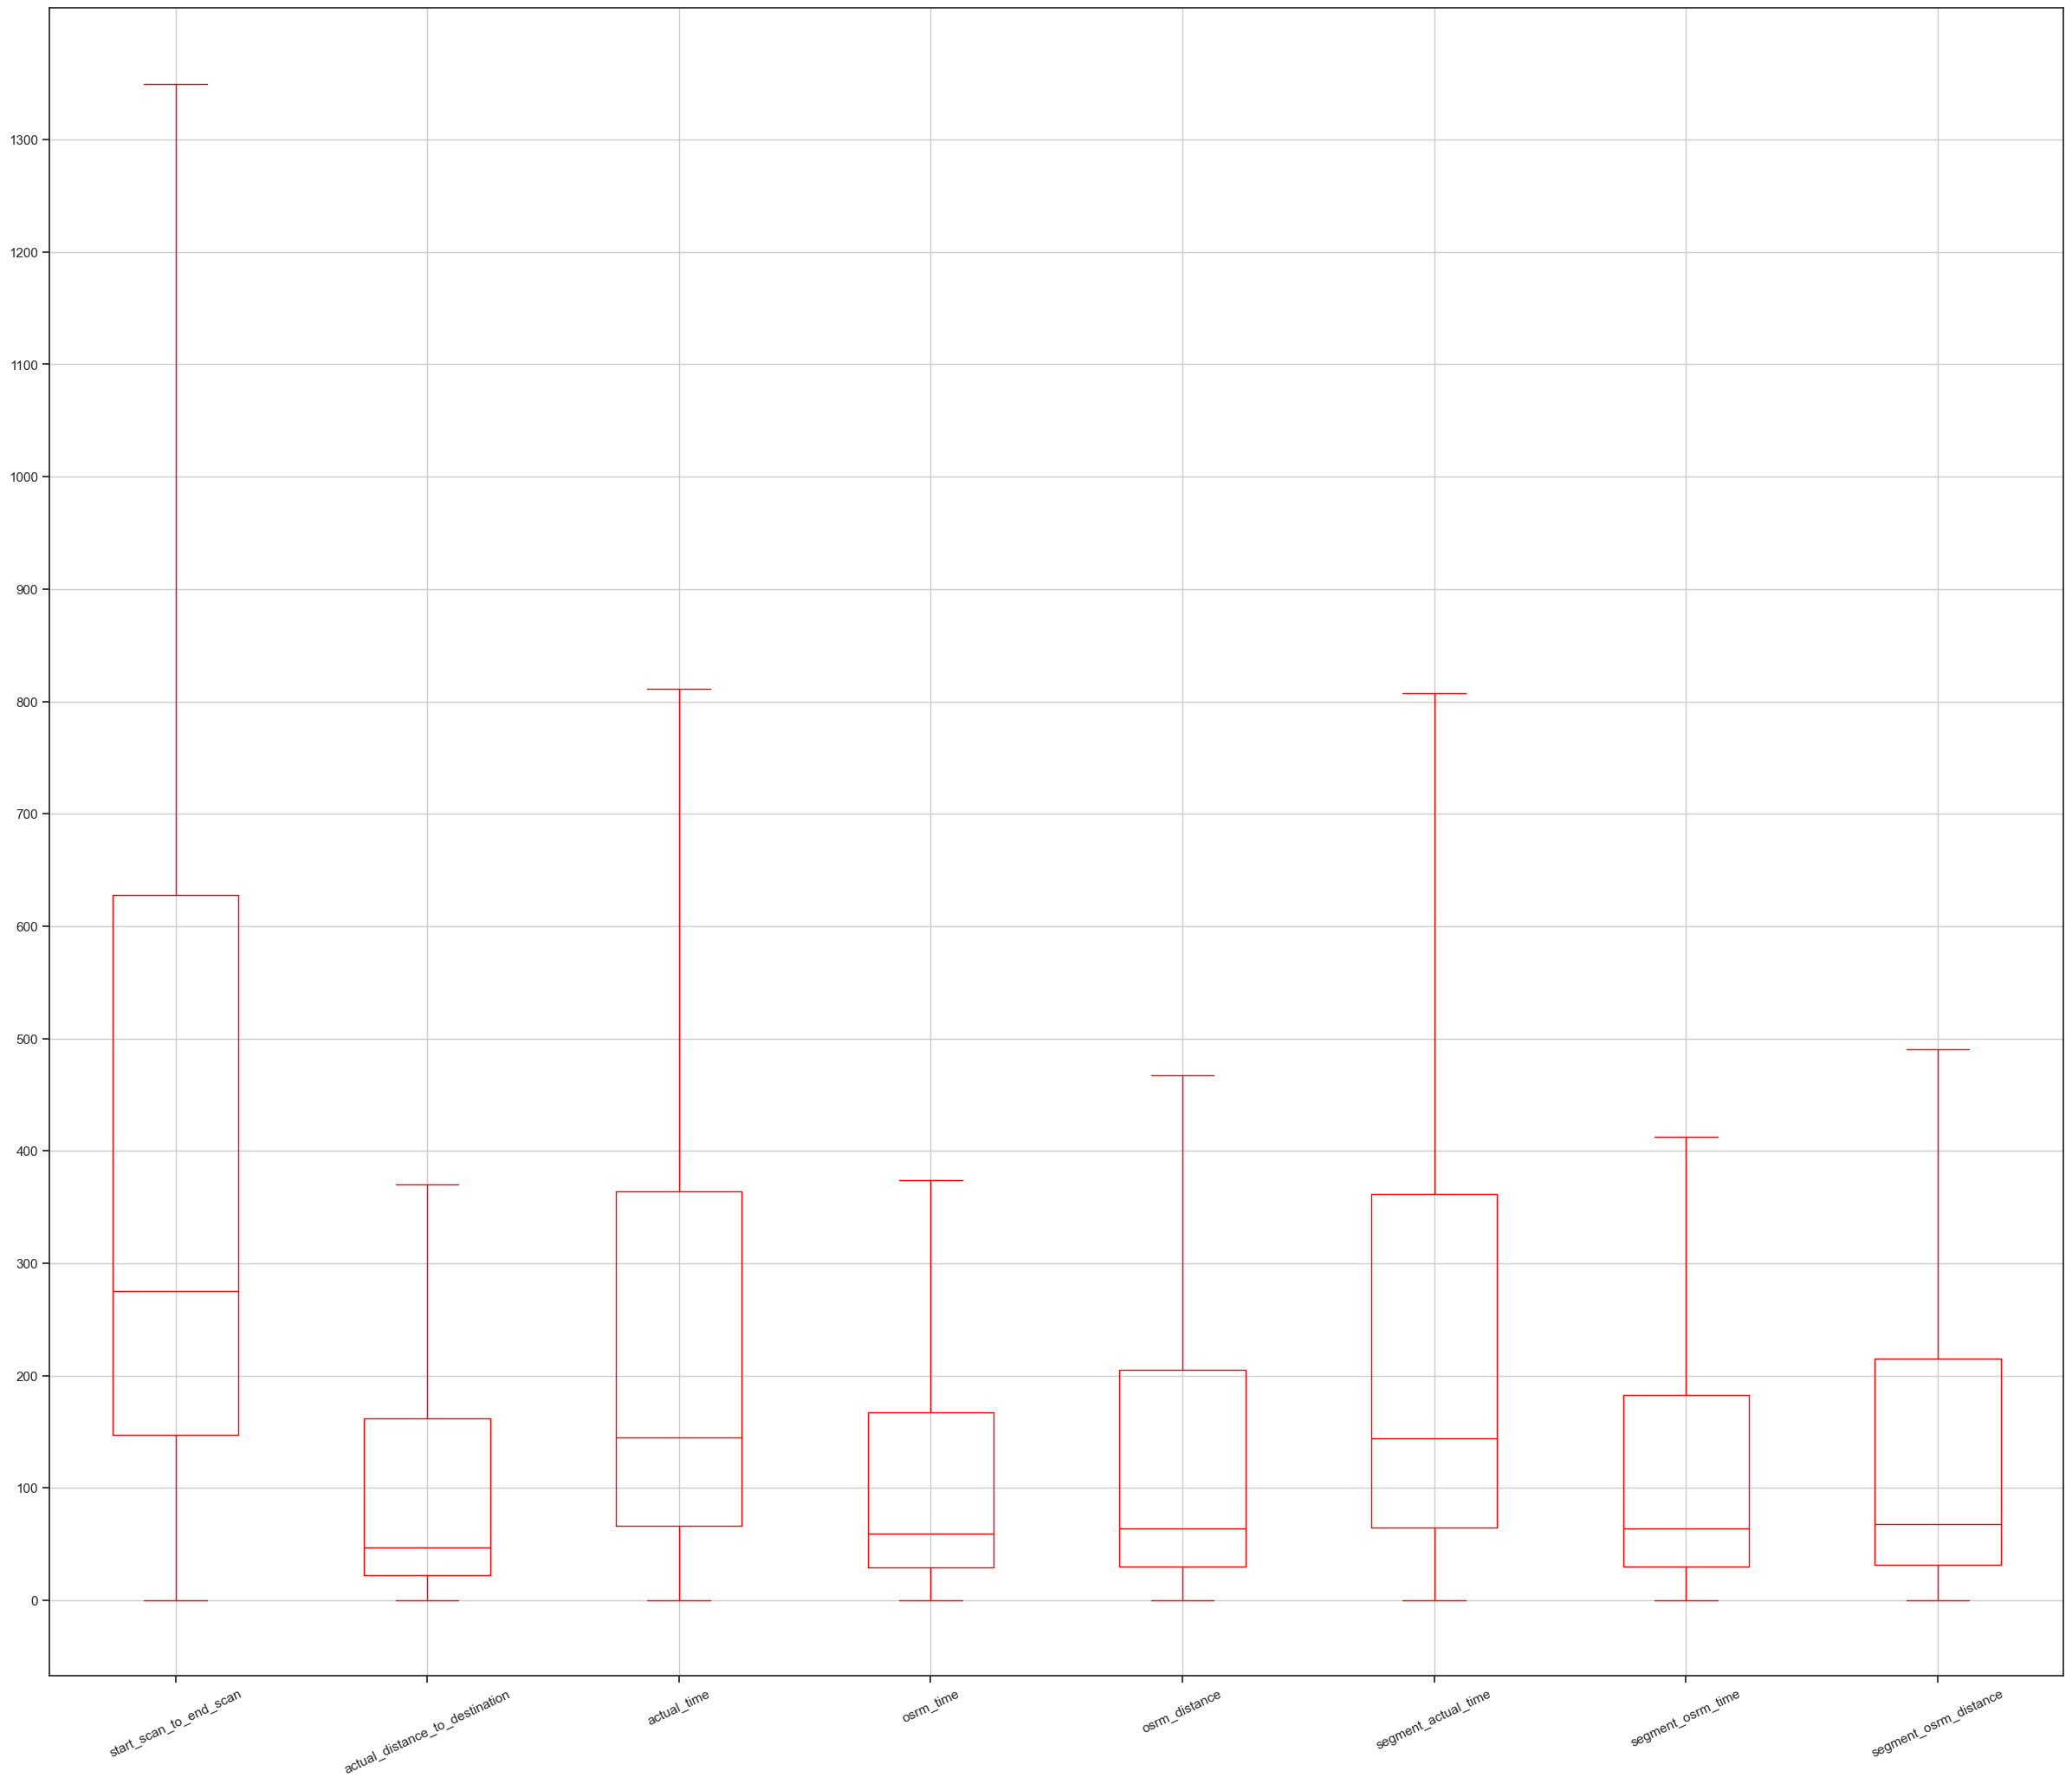

In [50]:
plt.figure(figsize=(30, 25))
dd_trips[numeric_cols].boxplot(rot=25, figsize=(35,20), color = 'r')

max_y = dd_trips[numeric_cols].max().max()
yticks = np.arange(0, max_y,100)

plt.yticks(yticks)
plt.show()

---

#### Column Encoding *️⃣

* Using one-hot encoding

In [51]:
one_hot_cols = ['data', 'route_type']
dd_trips = pd.get_dummies(dd_trips, columns=one_hot_cols, drop_first=True)
dd_trips.head()

,trip_uuid,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,source_code,destination_state,destination_city,destination_code,trip_creation_date,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week,trip_duration,data_training,route_type_FTL
0,trip-153671041653548748,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,1349.5,370.414062,811.0,374.0,467.117188,807.5,412.5,490.246094,Uttar Pradesh,Kanpur,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,2018-09-12,12.0,0.0,2.0,37,1 days 13:40:06.588003,True,True
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,180.0,73.171875,143.0,68.0,85.109375,141.0,65.0,84.189453,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,2018-09-12,12.0,0.0,2.0,37,0 days 03:01:36.712425,True,False
2,trip-153671043369099517,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,1349.5,370.414062,811.0,374.0,467.117188,807.5,412.5,490.246094,Haryana,Gurgaon,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB,2018-09-12,12.0,0.0,2.0,37,2 days 17:34:21.751204,True,True
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.171875,59.0,15.0,19.687500,59.0,16.0,19.878906,Maharashtra,Mumbai Hub,,Maharashtra,Mumbai,MiraRd_IP,2018-09-12,12.0,0.0,2.0,37,0 days 01:40:29.696112,True,False
4,trip-153671052974046625,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,717.0,127.437500,341.0,117.0,146.781250,340.0,115.0,146.792969,Karnataka,Bellary,Dc,Karnataka,Sandur,WrdN1DPP_D,2018-09-12,12.0,0.0,2.0,37,0 days 11:58:20.942506,True,True


---

## In-depth analysis 🔎
#### Hypothesis testing between actual_time aggregated value and OSRM time aggregated value

* STEP-1 : Set up Null Hypothesis
    - Null Hypothesis ( H0 ) - actual_time (Actual time taken to complete the delivery) and OSRM time (An open-source routing engine time calculator time) are same.
    - Alternate Hypothesis ( HA ) - actual_time and OSRM time are different.
* STEP-2 : Checking for basic assumptions for the hypothesis
* STEP-3: Define Test statistics; Distribution of T under H0.
* STEP-4: Compute the p-value and fix value of alpha.
We set our alpha to be 0.05
* STEP-5: Compare p-value and alpha.
Based on p-value, we will accept or reject H0.
    1. p-val > alpha : Accept H0
    2. p-val < alpha : Reject H0


In [52]:
dd_trips[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,14817.000000,14817.0
mean,259.478088,inf
std,257.924866,inf
min,0.000000,0.0
25%,66.000000,29.0
50%,145.000000,59.0
75%,364.000000,167.0
max,811.000000,374.0


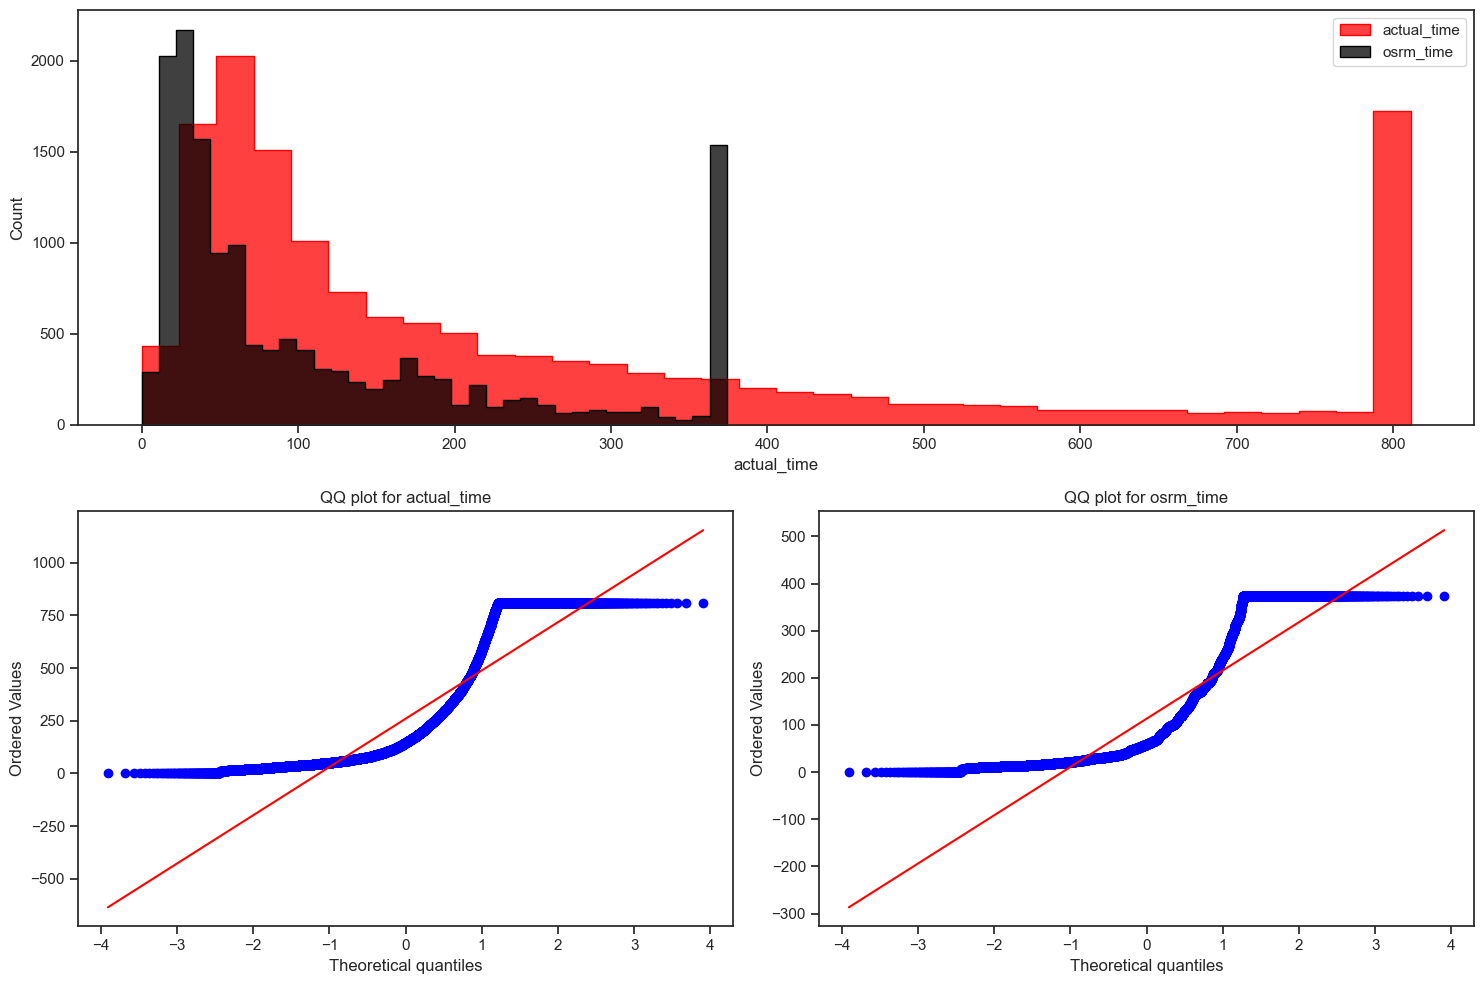

In [53]:
plt.figure(figsize=(15, 10))

# Histogram for actual_time and osrm_time
plt.subplot(2, 1, 1) 
sns.histplot(dd_trips['actual_time'], element = 'step', color = 'red')
sns.histplot(dd_trips['osrm_time'], element = 'step', color = 'black')
plt.legend(['actual_time', 'osrm_time'])

plt.subplot(2, 2, 3) 
stats.probplot(dd_trips['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')

plt.subplot(2, 2, 4)
stats.probplot(dd_trips['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')

plt.tight_layout()
plt.show()

* It can be seen from the above plots that the samples do not come from normal distribution.

In [54]:
test_stat, p_value = stats.mannwhitneyu(dd_trips['actual_time'], dd_trips['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
 print('actual_time and OSRM time are different.')
else:
 print('actual_time (Actual time taken to complete the delivery) and OSRM time (An open-source routing engine time calculator time) are same.') 

p-value 0.0
actual_time and OSRM time are different.


👁️‍🗨️ Since P Value is less that the significance threshold, therfore it can be concluded that  actual_time (Actual time taken to complete the delivery) and OSRM time (An open-source routing engine time calculator time) are different

---

#### Hypothesis testing between actual_time aggregated value and segment actual time aggregated value

* STEP-1 : Set up Null Hypothesis
    - Null Hypothesis ( H0 ) - actual_time (Actual time taken to complete the delivery) and segment actual time (Time taken by the subset of the package delivery) are same.
    - Alternate Hypothesis ( HA ) - actual_time and segment actual time are different.
* STEP-2 : Checking for basic assumptions for the hypothesis
* STEP-3: Define Test statistics; Distribution of T under H0.
* STEP-4: Compute the p-value and fix value of alpha.
We set our alpha to be 0.05
* STEP-5: Compare p-value and alpha.
Based on p-value, we will accept or reject H0.
    1. p-val > alpha : Accept H0
    2. p-val < alpha : Reject H0


In [55]:
dd_trips[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14817.000000,14817.000000
mean,259.478088,257.503387
std,257.924866,256.707428
min,0.000000,0.000000
25%,66.000000,65.000000
50%,145.000000,144.000000
75%,364.000000,362.000000
max,811.000000,807.500000


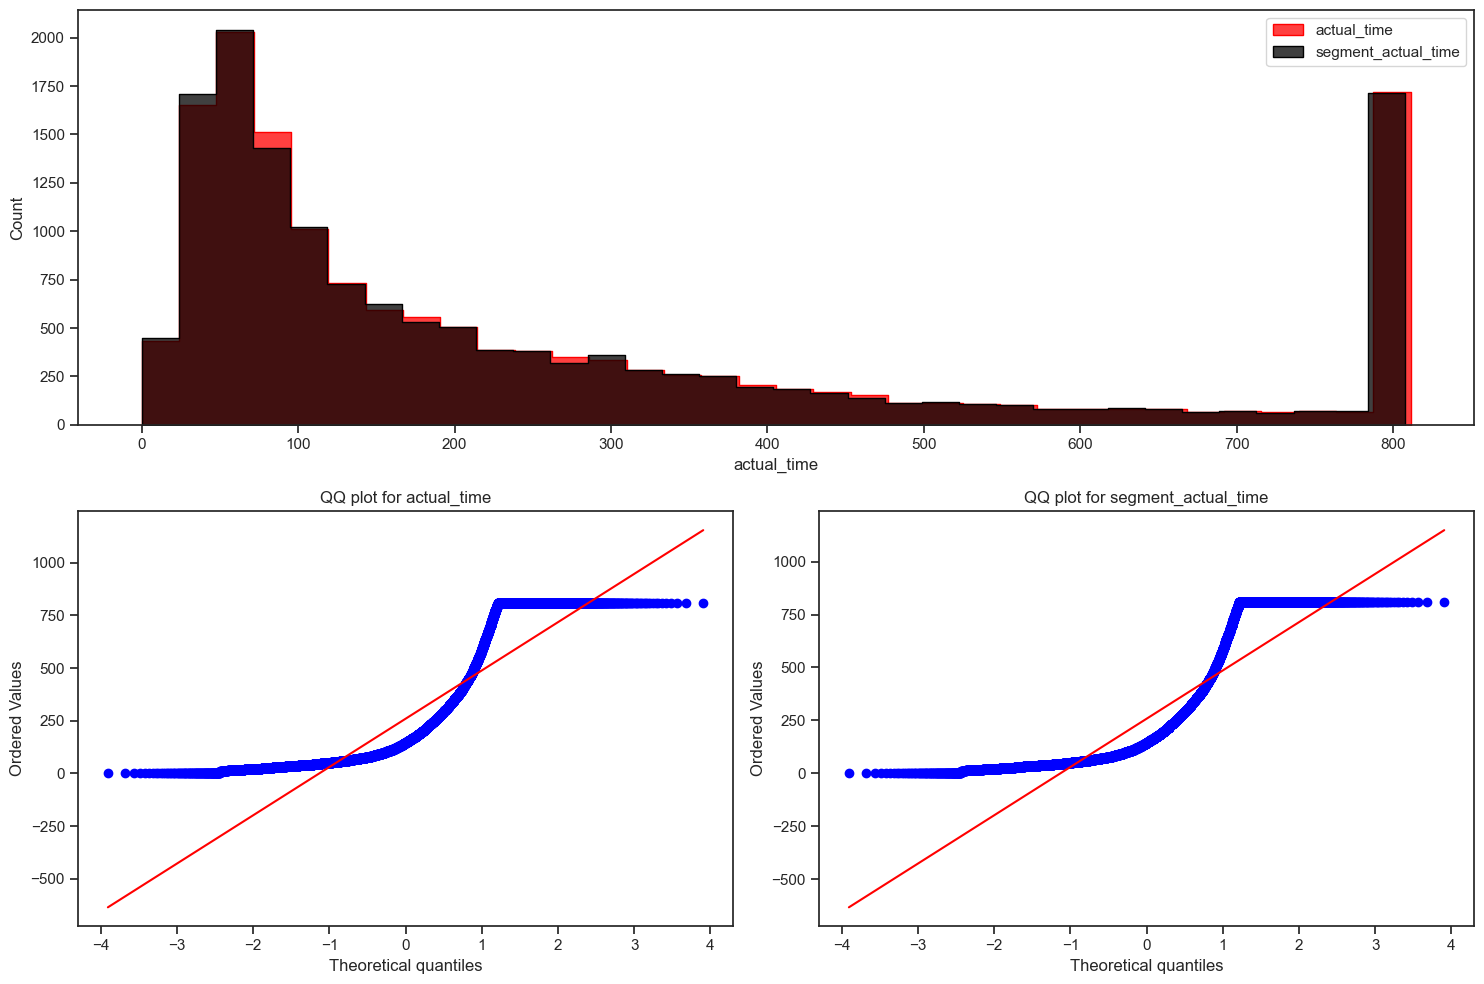

In [56]:
plt.figure(figsize=(15, 10))

# Histogram for actual_time and segment_actual_time
plt.subplot(2, 1, 1) 
sns.histplot(dd_trips['actual_time'], element = 'step', color = 'red')
sns.histplot(dd_trips['segment_actual_time'], element = 'step', color = 'black')
plt.legend(['actual_time', 'segment_actual_time'])

plt.subplot(2, 2, 3) 
stats.probplot(dd_trips['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')

plt.subplot(2, 2, 4)
stats.probplot(dd_trips['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')

plt.tight_layout()
plt.show()

* It can be seen from the above plots that the samples do not come from normal distribution.

In [57]:
test_stat, p_value = stats.mannwhitneyu(dd_trips['actual_time'], dd_trips['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
 print('actual_time and segment actual time are different.')
else:
 print('actual_time (Actual time taken to complete the delivery) and segment actual time (Time taken by the subset of the package delivery) are same.') 

p-value 0.007404217536110528
actual_time and segment actual time are different.


👁️‍🗨️ Since P Value is less that the significance threshold, therfore it can be concluded that actual_time (Actual time taken to complete the delivery) and segment actual time (Time taken by the subset of the package delivery) are different

---

#### Hypothesis testing between osrm distance aggregated value and segment osrm distance aggregated value

* STEP-1 : Set up Null Hypothesis
    - Null Hypothesis ( H0 ) - osrm distance (An open-source routing engine which computes the shortest path between points) and segment osrm distance (OSRM Distance covered by subset of the package delivery) are same.
    - Alternate Hypothesis ( HA ) - osrm distance and segment osrm distance are different.
* STEP-2 : Checking for basic assumptions for the hypothesis
* STEP-3: Define Test statistics; Distribution of T under H0.
* STEP-4: Compute the p-value and fix value of alpha.
We set our alpha to be 0.05
* STEP-5: Compare p-value and alpha.
Based on p-value, we will accept or reject H0.
    1. p-val > alpha : Accept H0
    2. p-val < alpha : Reject H0


In [58]:
dd_trips[['osrm_distance', 'segment_actual_time']].describe()

,osrm_distance,segment_actual_time
count,14817.000000,14817.000000
mean,136.059814,257.503387
std,145.850739,256.707428
min,0.000000,0.000000
25%,30.203125,65.000000
50%,64.078125,144.000000
75%,204.968750,362.000000
max,467.117188,807.500000


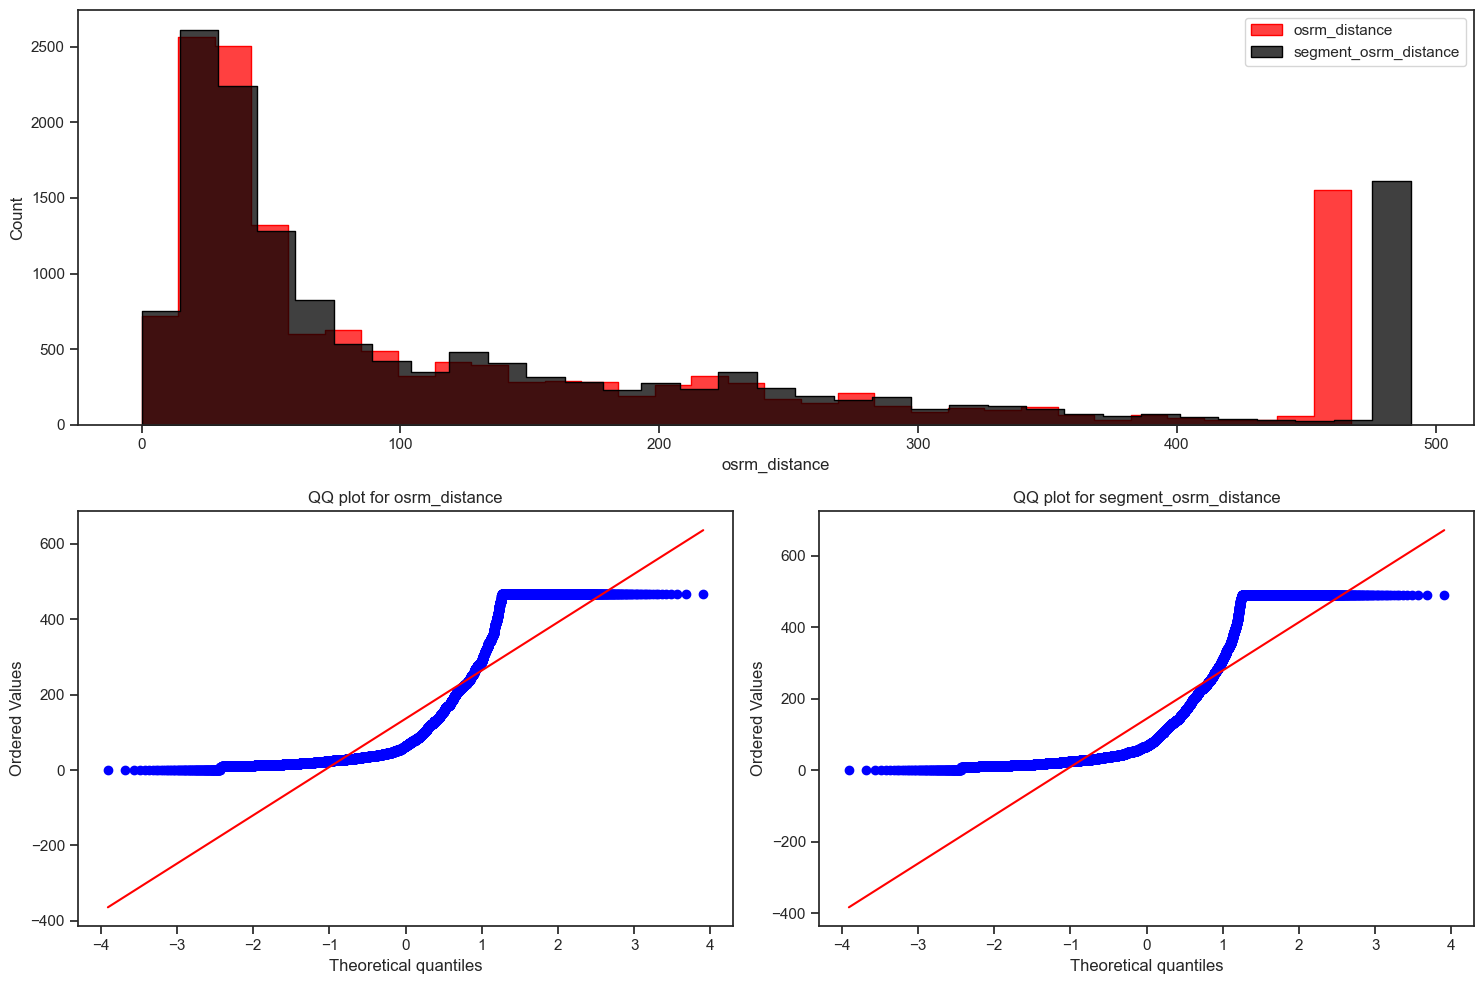

In [59]:
plt.figure(figsize=(15, 10))

# Histogram for osrm_distance and segment_osrm_distance
plt.subplot(2, 1, 1) 
sns.histplot(dd_trips['osrm_distance'], element = 'step', color = 'red')
sns.histplot(dd_trips['segment_osrm_distance'], element = 'step', color = 'black')
plt.legend(['osrm_distance', 'segment_osrm_distance'])

plt.subplot(2, 2, 3) 
stats.probplot(dd_trips['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')

plt.subplot(2, 2, 4)
stats.probplot(dd_trips['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')

plt.tight_layout()
plt.show()

In [60]:
test_stat, p_value = stats.mannwhitneyu(dd_trips['osrm_distance'], dd_trips['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
 print('osrm distance and segment osrm distance are different.')
else:
 print('osrm distance (An open-source routing engine which computes the shortest path between points) and segment osrm distance (OSRM Distance covered by subset of the package delivery) are same.') 

p-value 1.156125417216877e-10
osrm distance and segment osrm distance are different.


👁️‍🗨️ Since P Value is less that the significance threshold, therfore it can be concluded that osrm distance (An open-source routing engine which computes the shortest path between points) and segment osrm distance (OSRM Distance covered by subset of the package delivery) are different

---

#### Hypothesis testing between osrm time aggregated value and segment osrm time aggregated value

* STEP-1 : Set up Null Hypothesis
    - Null Hypothesis ( H0 ) - osrm time (An open-source routing engine time) and segment osrm time (OSRM segment time taken by the subset of the package delivery) are same.
    - Alternate Hypothesis ( HA ) - osrm time and segment osrm time are different.
* STEP-2 : Checking for basic assumptions for the hypothesis
* STEP-3: Define Test statistics; Distribution of T under H0.
* STEP-4: Compute the p-value and fix value of alpha.
We set our alpha to be 0.05
* STEP-5: Compare p-value and alpha.
Based on p-value, we will accept or reject H0.
    1. p-val > alpha : Accept H0
    2. p-val < alpha : Reject H0


In [61]:
dd_trips[['osrm_time', 'segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14817.0,14817.000000
mean,inf,124.304619
std,inf,127.660896
min,0.0,0.000000
25%,29.0,30.000000
50%,59.0,64.000000
75%,167.0,183.000000
max,374.0,412.500000


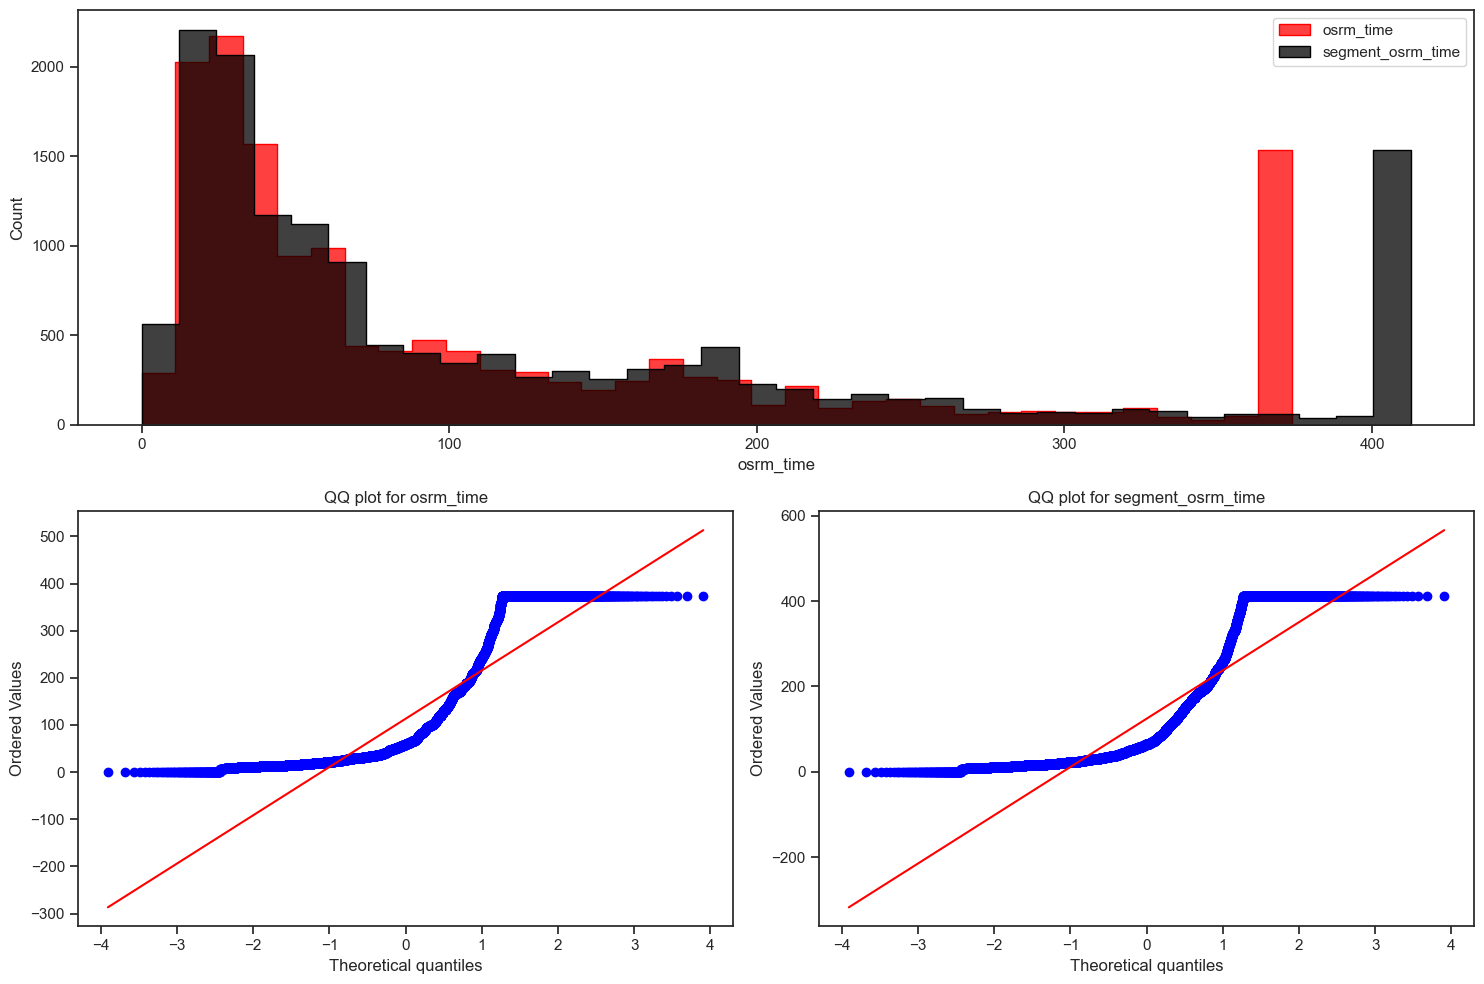

In [62]:
plt.figure(figsize=(15, 10))

# Histogram for osrm_time and segment_osrm_time
plt.subplot(2, 1, 1) 
sns.histplot(dd_trips['osrm_time'], element = 'step', color = 'red')
sns.histplot(dd_trips['segment_osrm_time'], element = 'step', color = 'black')
plt.legend(['osrm_time', 'segment_osrm_time'])

plt.subplot(2, 2, 3) 
stats.probplot(dd_trips['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')

plt.subplot(2, 2, 4)
stats.probplot(dd_trips['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')

plt.tight_layout()
plt.show()

In [63]:
test_stat, p_value = stats.mannwhitneyu(dd_trips['osrm_time'], dd_trips['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
 print('osrm time and segment osrm time are different.')
else:
 print('osrm time (An open-source routing engine time) and segment osrm time (OSRM segment time taken by the subset of the package delivery) are same.') 

p-value 1.7858750648454436e-12
osrm time and segment osrm time are different.


👁️‍🗨️ Since P Value is less that the significance threshold, therfore it can be concluded that osrm time (An open-source routing engine time) and segment osrm time (OSRM segment time taken by the subset of the package delivery) are different

---

#### Data Normalization 🟰

* Preforming Min-Max Scaling since the data is not gaussian

In [64]:
min_max_scaler = MinMaxScaler()
dd_trips[numeric_cols] = min_max_scaler.fit_transform(dd_trips[numeric_cols])
dd_trips.head()

,trip_uuid,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,source_code,destination_state,destination_city,destination_code,trip_creation_date,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week,trip_duration,data_training,route_type_FTL
0,trip-153671041653548748,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Uttar Pradesh,Kanpur,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,2018-09-12,12.0,0.0,2.0,37,1 days 13:40:06.588003,True,True
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,0.133383,0.197541,0.176326,0.181818,0.182201,0.174613,0.157576,0.171729,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,2018-09-12,12.0,0.0,2.0,37,0 days 03:01:36.712425,True,False
2,trip-153671043369099517,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Haryana,Gurgaon,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB,2018-09-12,12.0,0.0,2.0,37,2 days 17:34:21.751204,True,True
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,0.074102,0.046359,0.072750,0.040107,0.042147,0.073065,0.038788,0.040549,Maharashtra,Mumbai Hub,,Maharashtra,Mumbai,MiraRd_IP,2018-09-12,12.0,0.0,2.0,37,0 days 01:40:29.696112,True,False
4,trip-153671052974046625,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,0.531308,0.344041,0.420469,0.312834,0.314228,0.421053,0.278788,0.299427,Karnataka,Bellary,Dc,Karnataka,Sandur,WrdN1DPP_D,2018-09-12,12.0,0.0,2.0,37,0 days 11:58:20.942506,True,True


In [65]:
dd_trips[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,14817.0,0.331236,0.301328,0.0,0.108929,0.203779,0.465358,1.0
actual_distance_to_destination,14817.0,0.288992,0.312620,0.0,0.060279,0.127729,0.436167,1.0
actual_time,14817.0,0.319948,0.318033,0.0,0.081381,0.178792,0.448829,1.0
osrm_time,14817.0,0.302846,0.309433,0.0,0.077540,0.157754,0.446524,1.0
osrm_distance,14817.0,0.291276,0.312236,0.0,0.064659,0.137178,0.438795,1.0
segment_actual_time,14817.0,0.318890,0.317904,0.0,0.080495,0.178328,0.448297,1.0
segment_osrm_time,14817.0,0.301345,0.309481,0.0,0.072727,0.155152,0.443636,1.0
segment_osrm_distance,14817.0,0.294505,0.312726,0.0,0.064923,0.138963,0.438954,1.0


---

#### Business Insights 🔎

1. Data Overview:

    - The data spans from '2018-09-12' to '2018-10-03'.
    - There are 14,707 unique trip IDs.
    - The dataset includes 1,494 unique source centers and 1,465 unique destination centers.
    - There are 704 unique source cities and 828 unique destination cities.
 
2. Data Distribution:

    - A larger portion of the data is for testing rather than training.
    - The most common route type is Carting.

3. Data Gaps:

    - The names of 14 unique location IDs are missing from the data.

4. Trip Timing and Frequency:

    - The number of trips starts to increase after noon, peaks at 10 P.M., and then begins to decrease.
    - Most orders are placed mid-month, indicating a higher customer activity during this period.

5. Geographical Insights:
    - Orders are primarily sourced from Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana.
    - Most of the Order are delivered to Bangalore followed by Gurgaon, Mumbai, Chennai, Hyderabad, Delhi.
    - Most of the orders are coming from Bangalore followed by Gurgaon, Bhiwandi, Delhi, Mumbai, Chennai.

6. Feature Analysis:
    - The features actual_time and osrm_time are statistically different.
    - The features actual_time and segment_actual_time are statistically different.
    - The features osrm_distance and segment_osrm_distance are statistically different.
    - The features osrm_time and segment_osrm_time are not statistically the same.

### Recommendations 💡
1. Enhance the OSRM Trip Planning System:

    - The OSRM trip planning system requires improvement to better cater to transporters and ensure optimal routing results.

2. Address Discrepancies in Time Predictions:
    - The significant difference between osrm_time and actual_time needs to be minimized. The team should work on reducing this discrepancy to provide more accurate delivery time predictions, improving customer satisfaction with precise delivery expectations.
3. Improve Distance Accuracy:
    - The observed difference between osrm_distance and the actual distance covered suggests that delivery personnel may not be following the predefined route, or the OSRM system is not accurately predicting routes based on factors such as distance, traffic, and other conditions. This could lead to late deliveries. The team should investigate and resolve these issues to enhance delivery efficiency and reliability.